In [1]:
import numpy as np
import matplotlib.pyplot as plt
import magnetic_boundaries as mb
from math import pi

In [3]:
parameters = dict(
    Ly = 61,
    Lx = 61,
)


path = 'data/'
name = 'disorder_tangent'

number_of_jobs = 100
nbands = (parameters['Lx']*parameters['Ly'])//2
spectrum = np.zeros((number_of_jobs,nbands))

for job in range(number_of_jobs):
    spectrum[job] = np.load(path+name+'_Lx'+str(parameters['Lx'])+'_Ly'+str(parameters['Ly'])+str(job)+'.npy', allow_pickle=True)

/tmp/ipykernel_28889/3389644702.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize = (7,7))


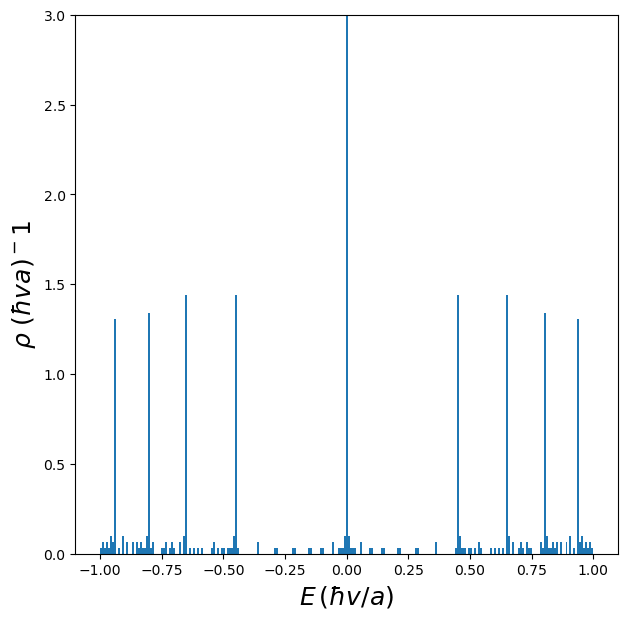

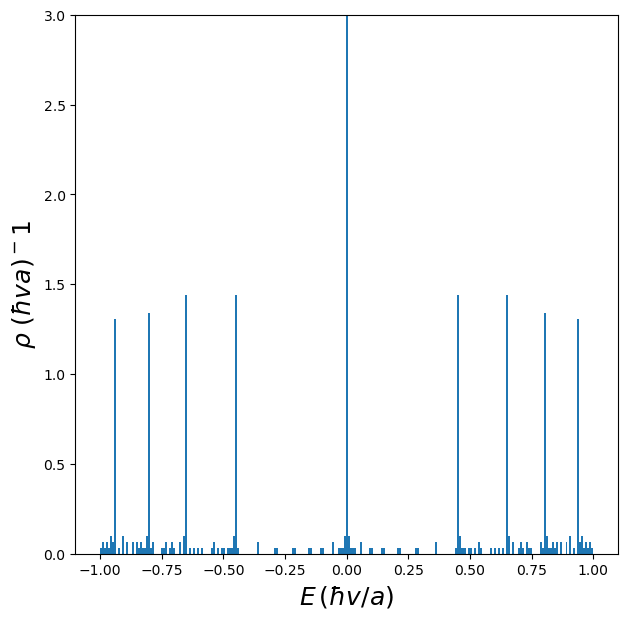

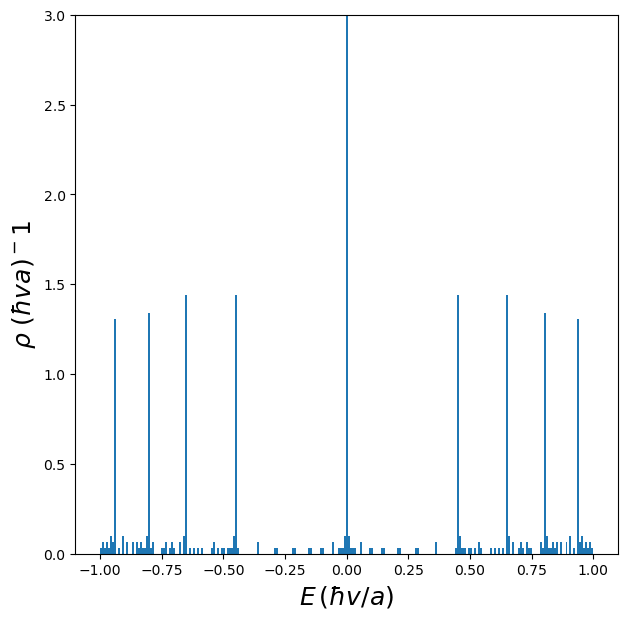

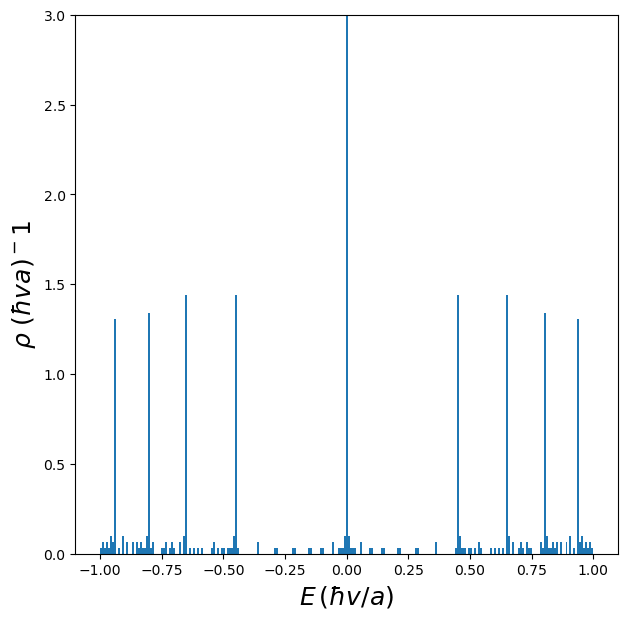

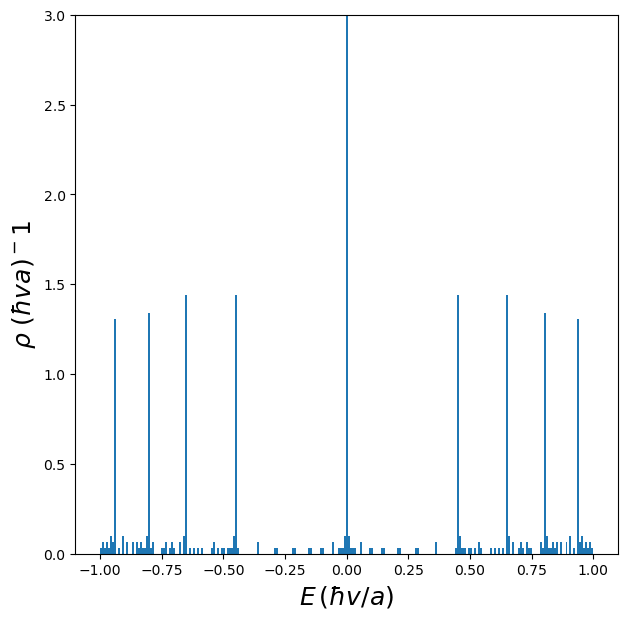

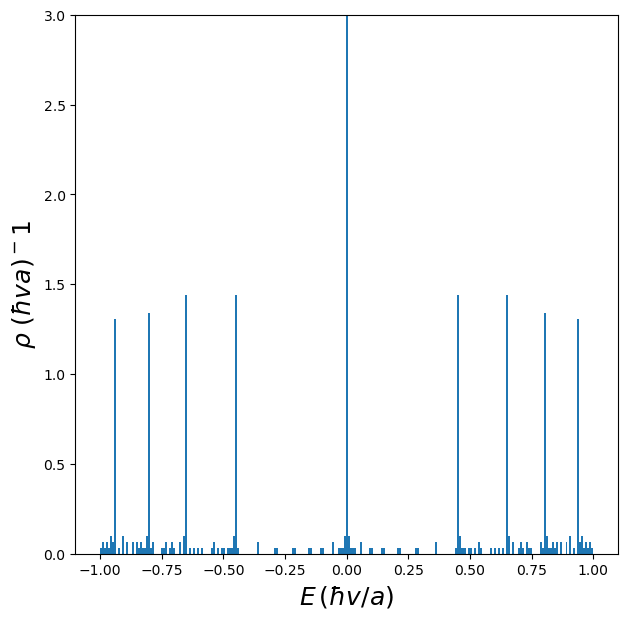

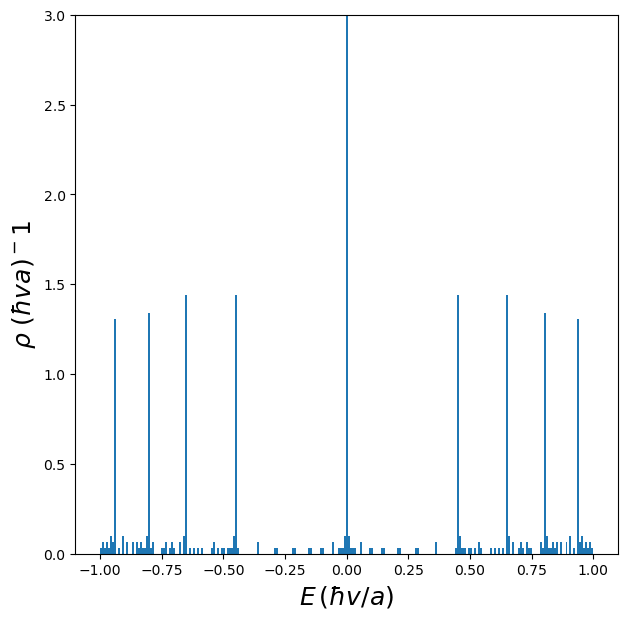

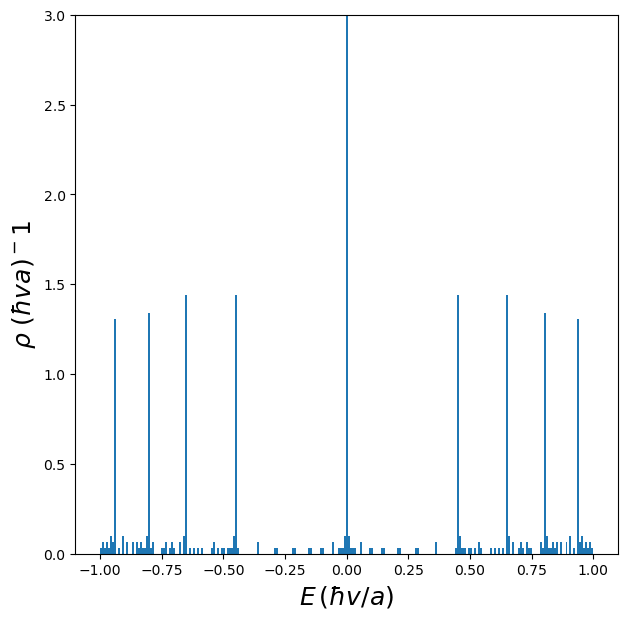

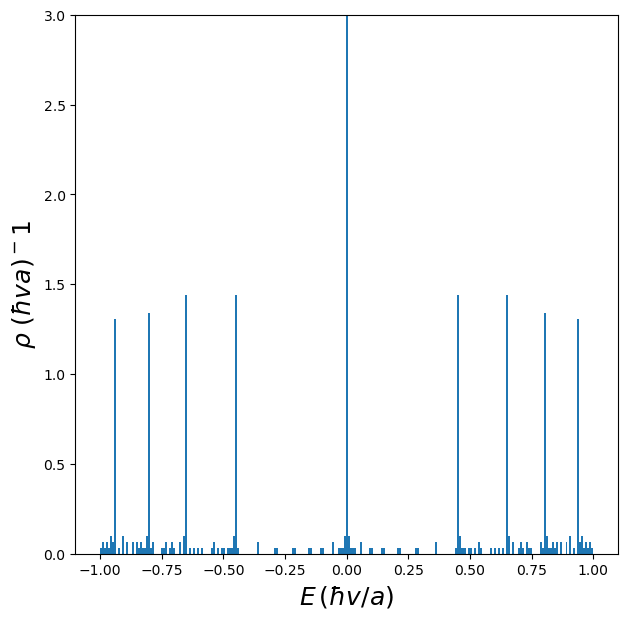

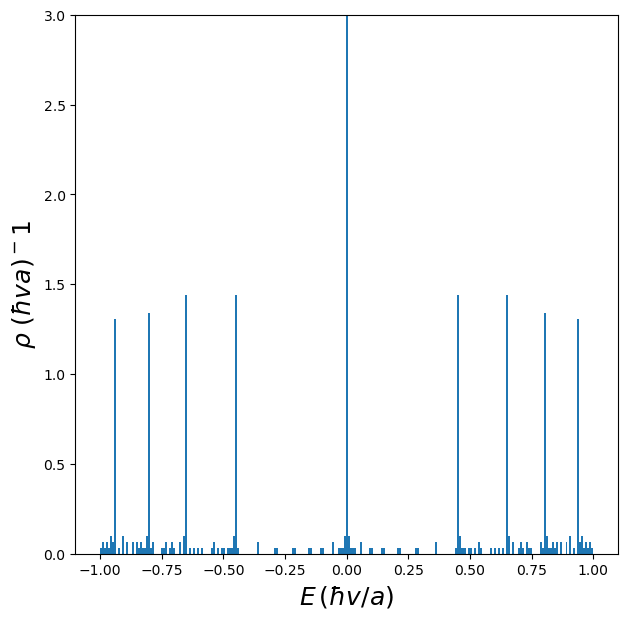

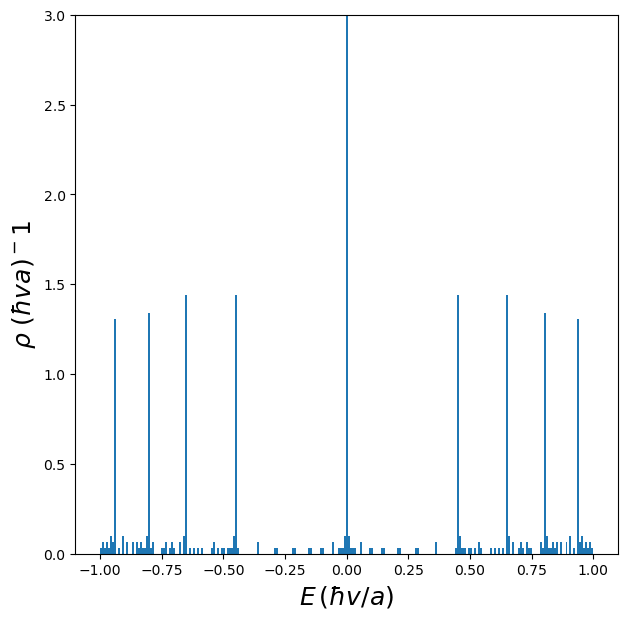

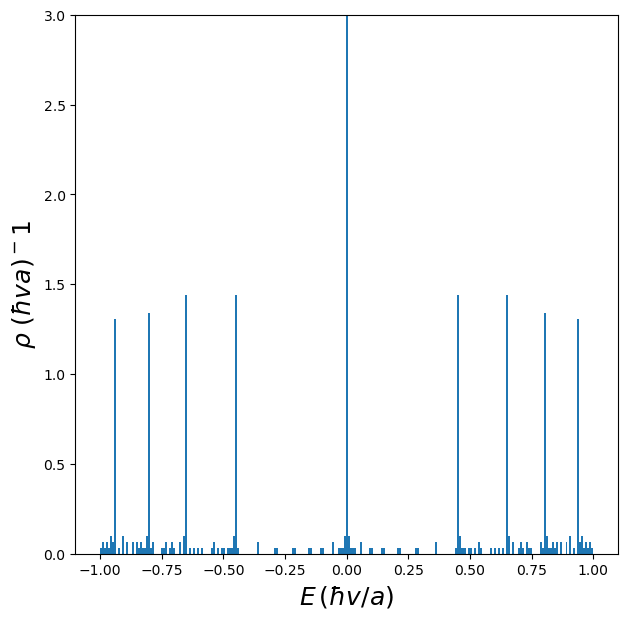

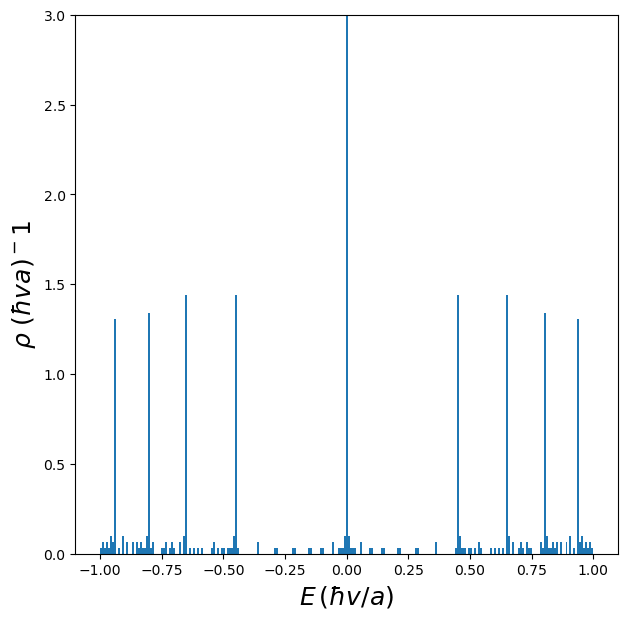

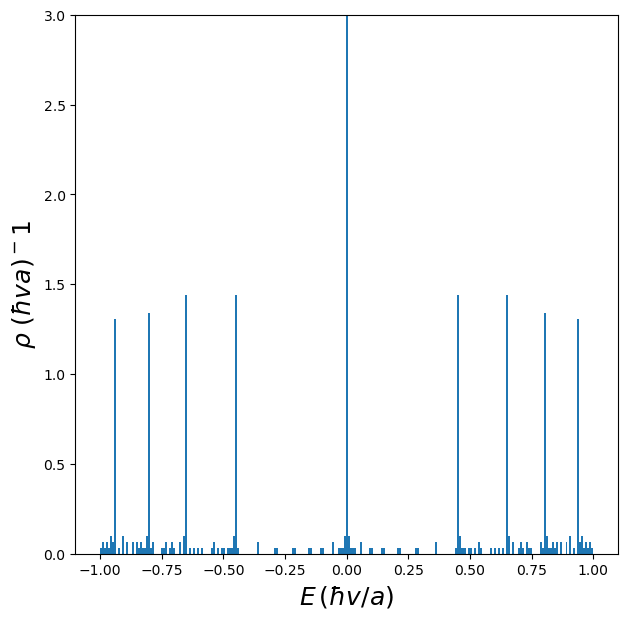

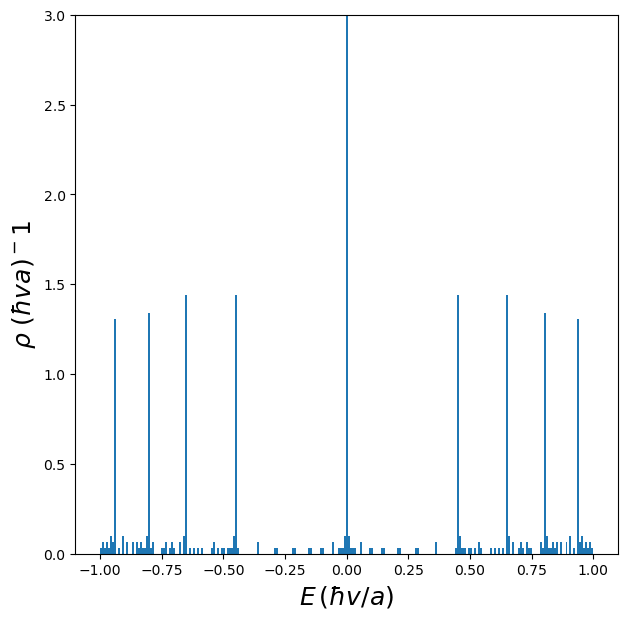

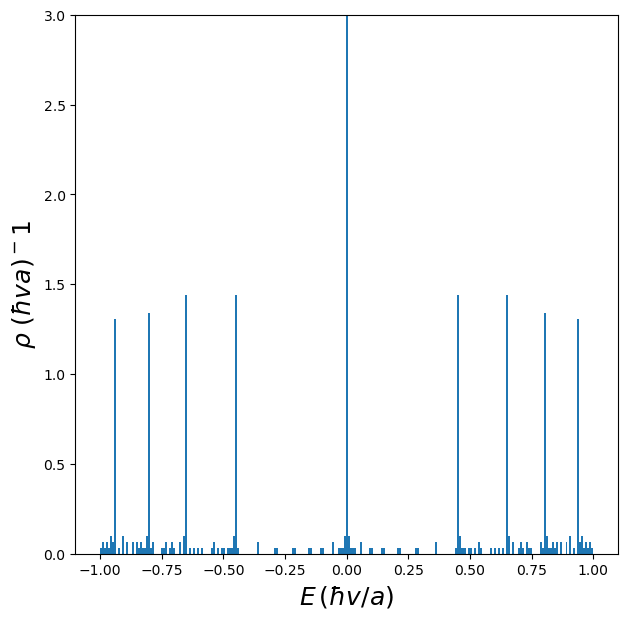

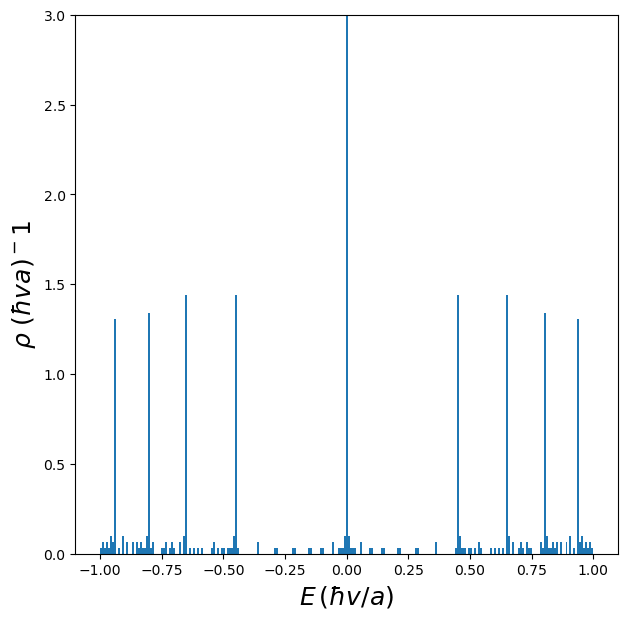

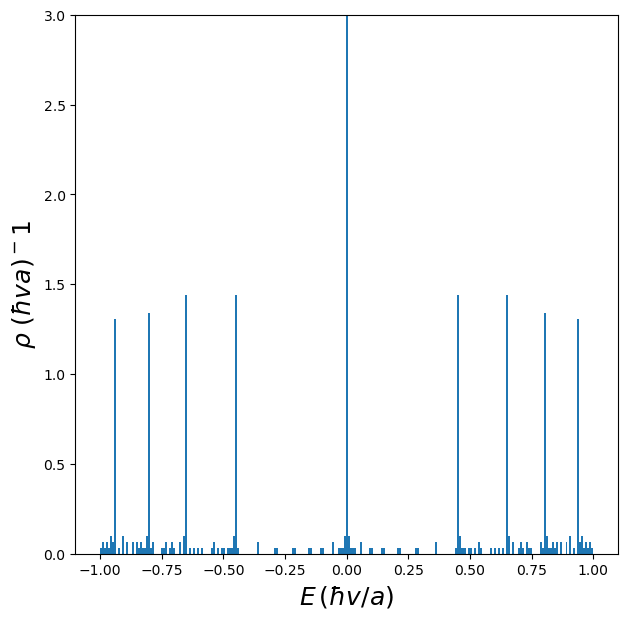

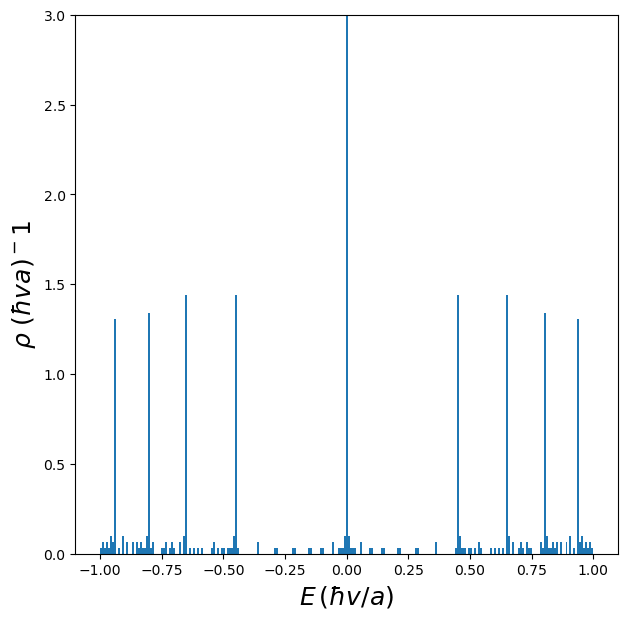

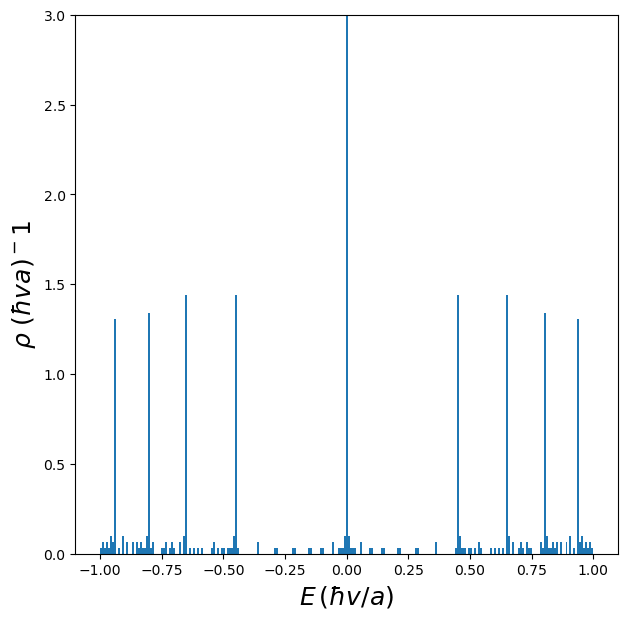

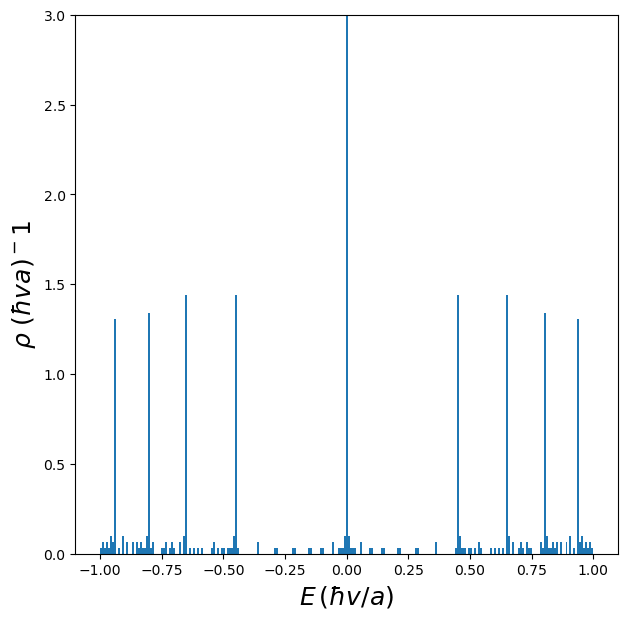

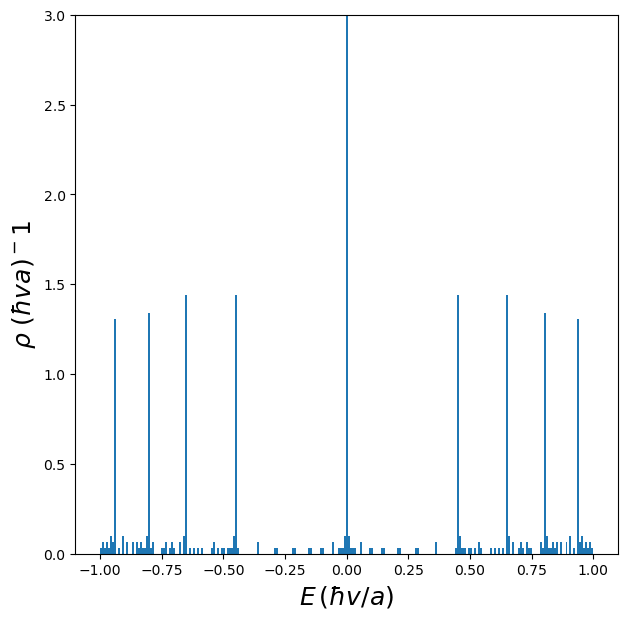

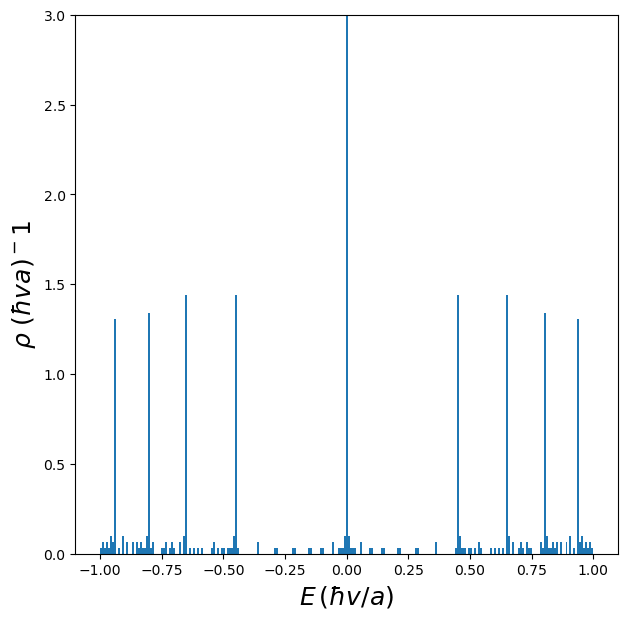

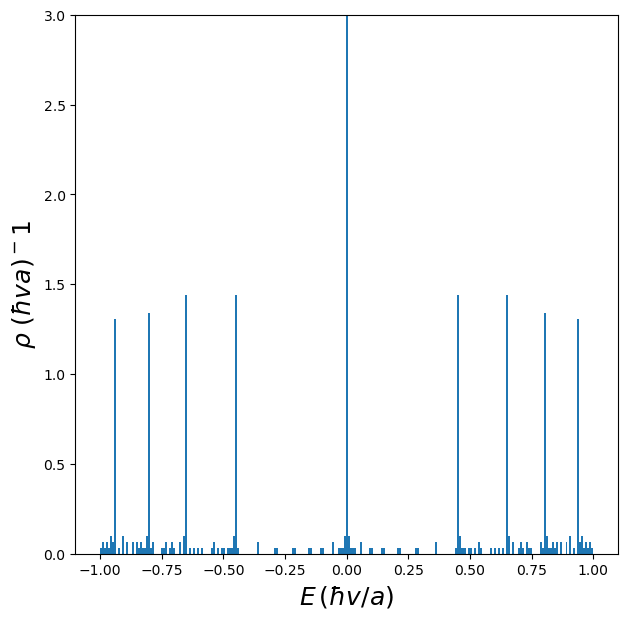

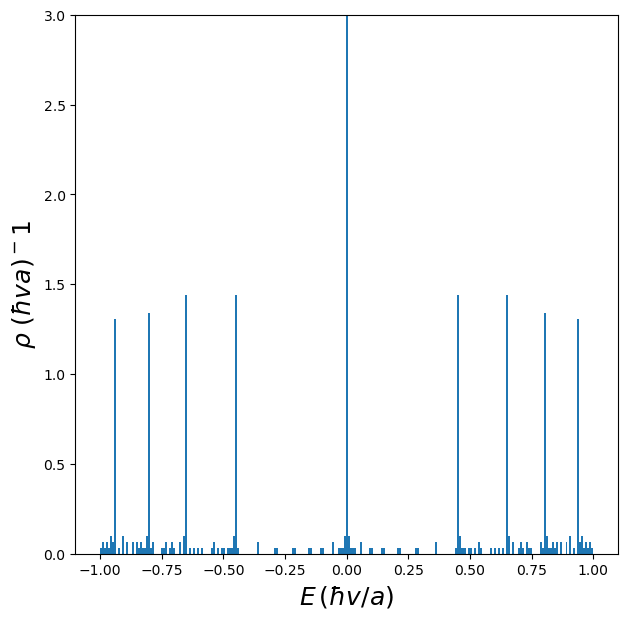

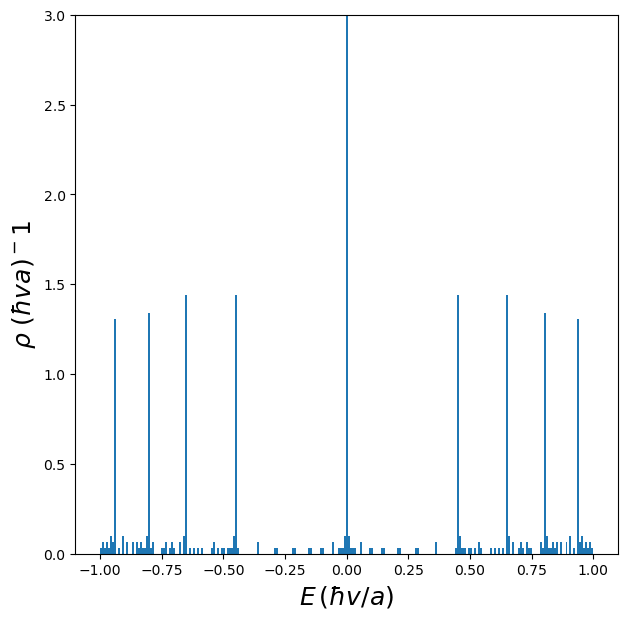

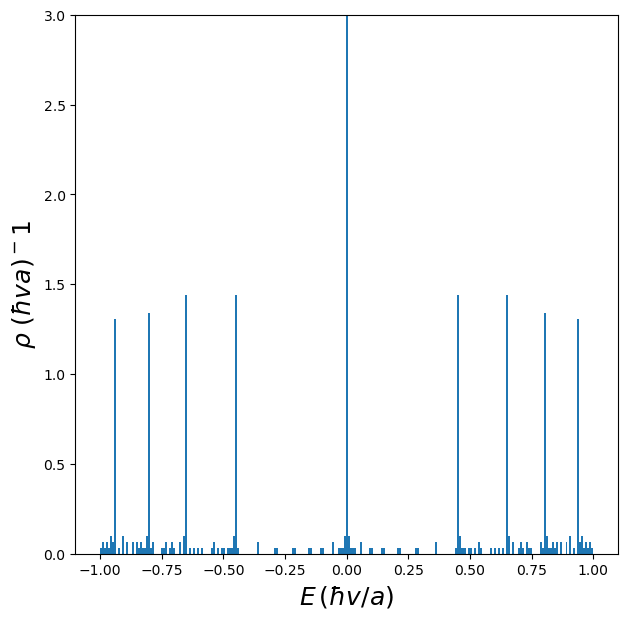

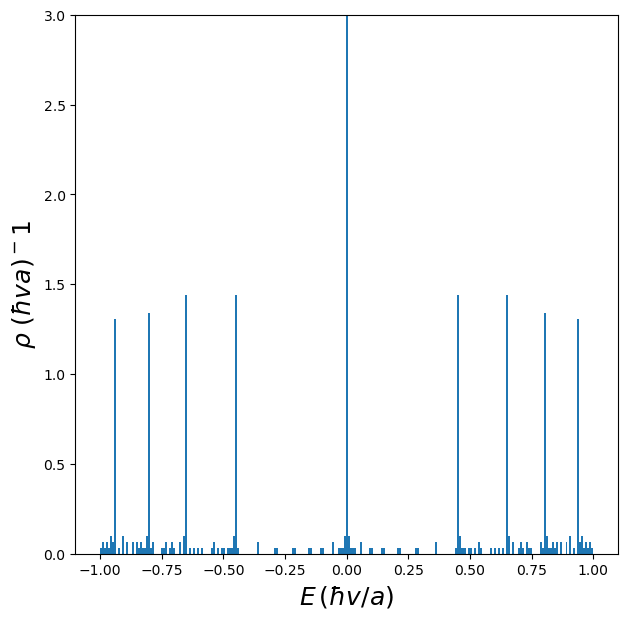

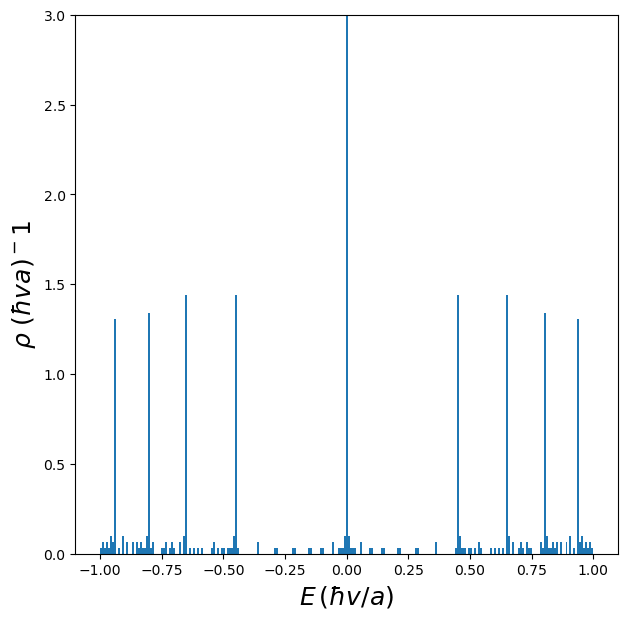

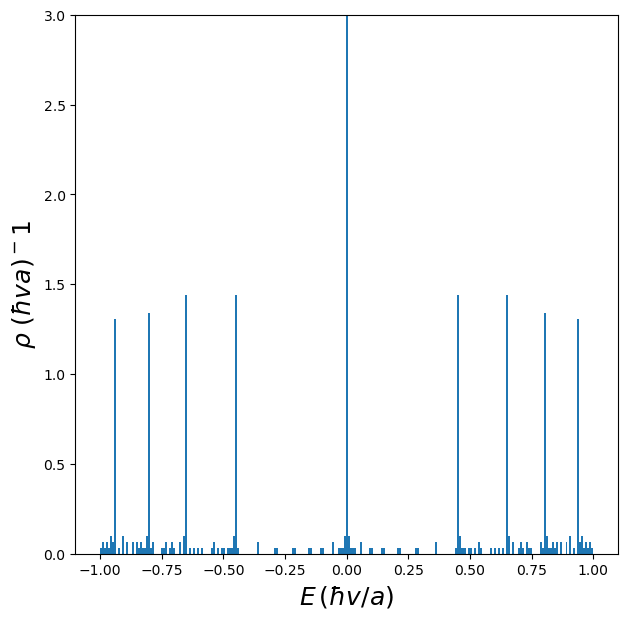

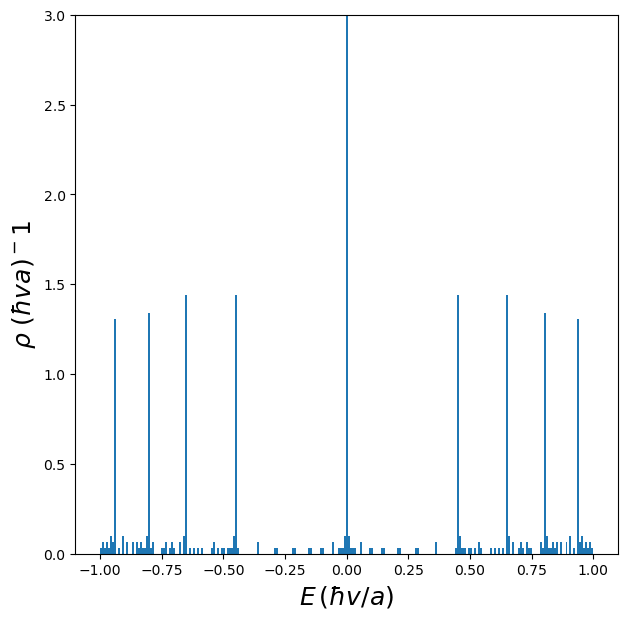

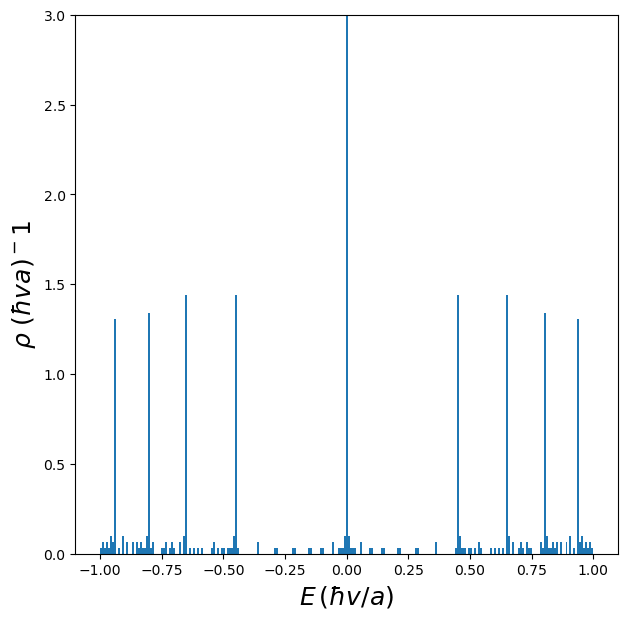

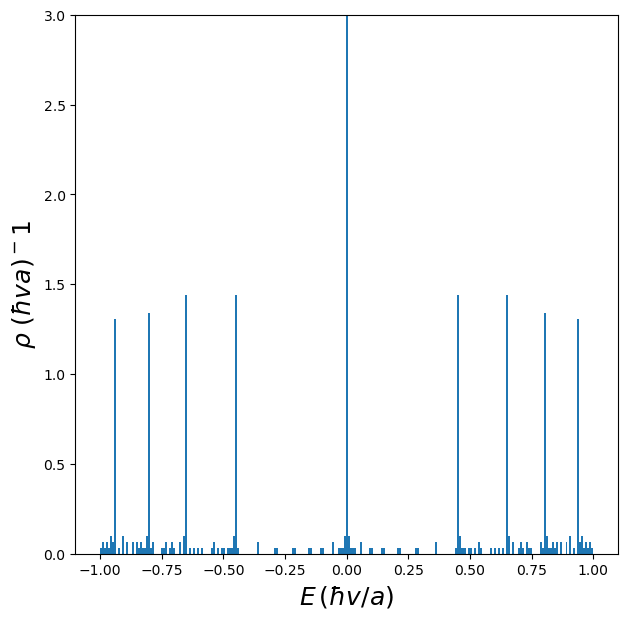

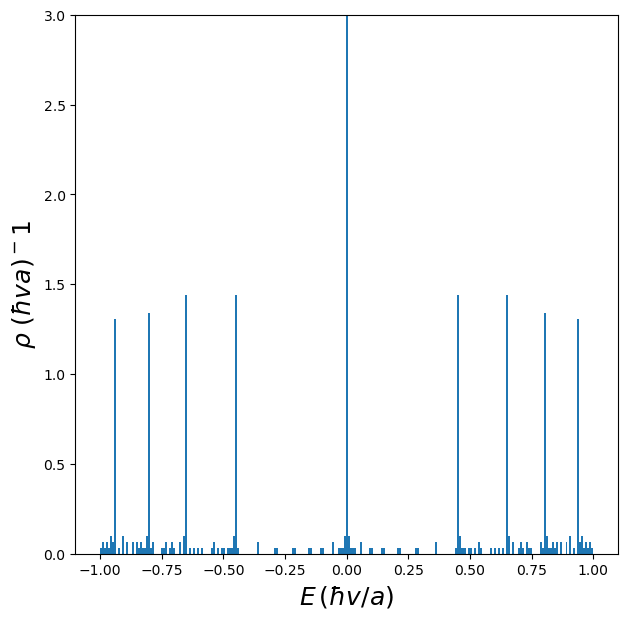

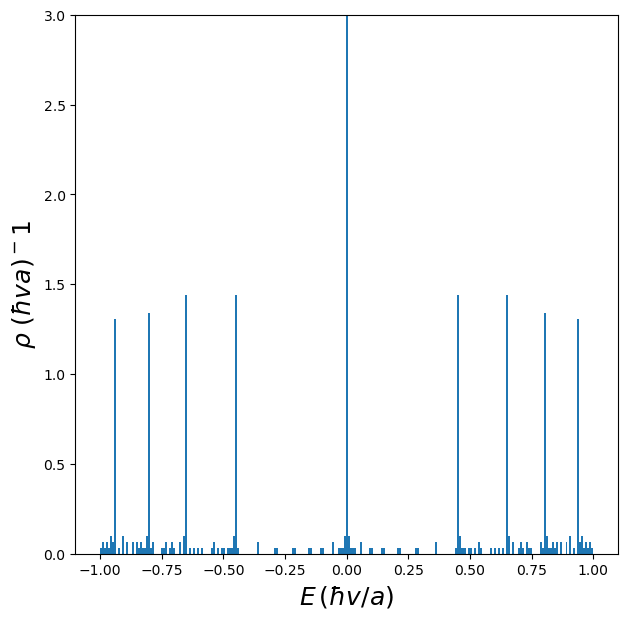

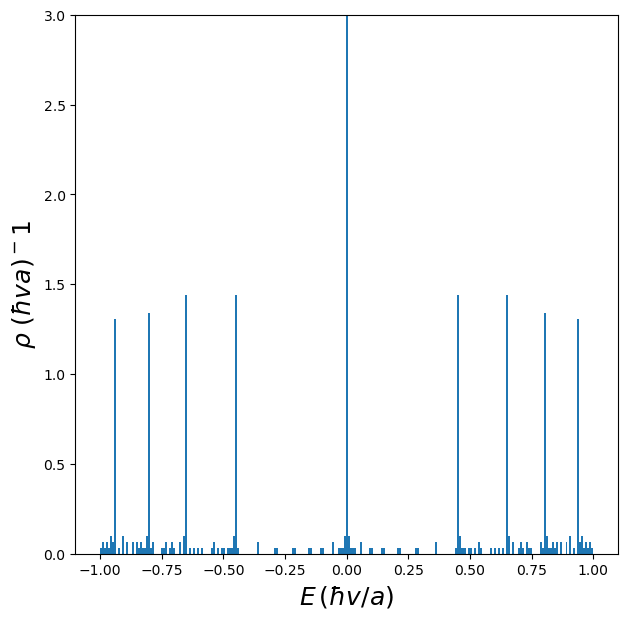

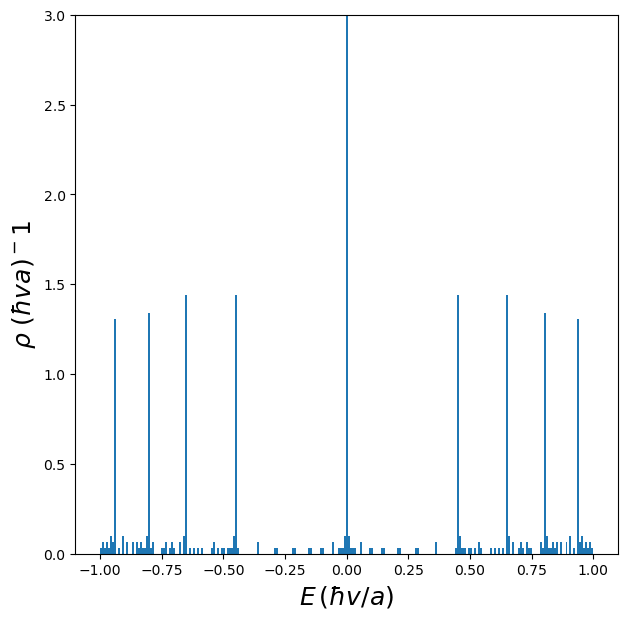

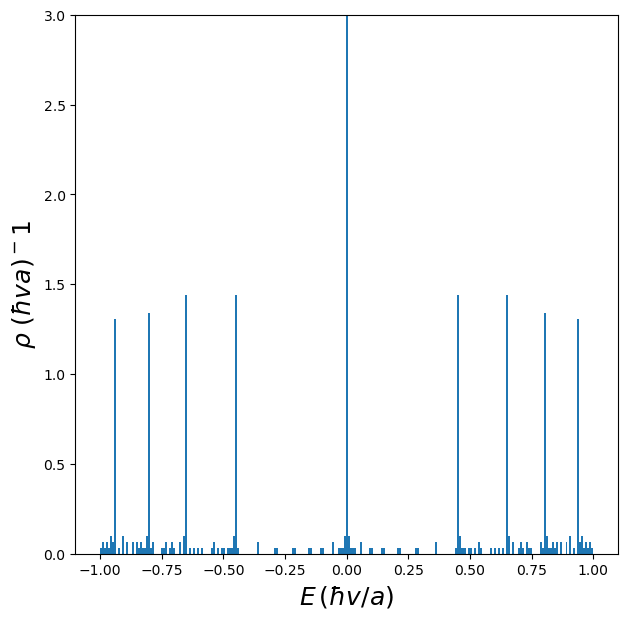

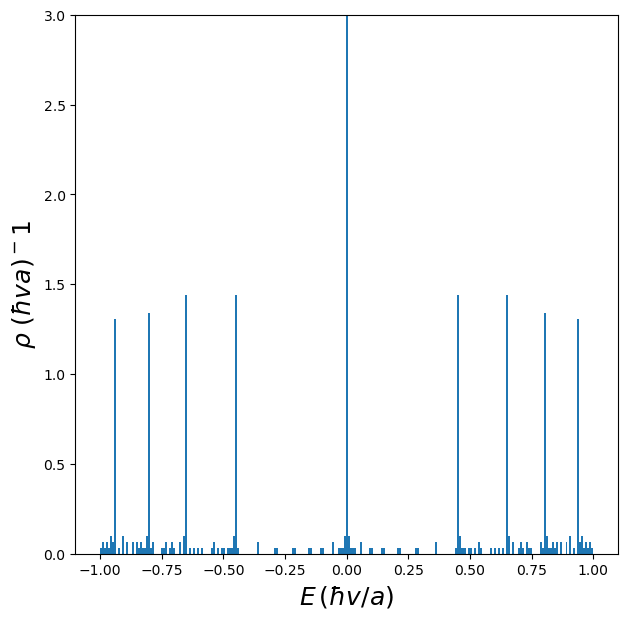

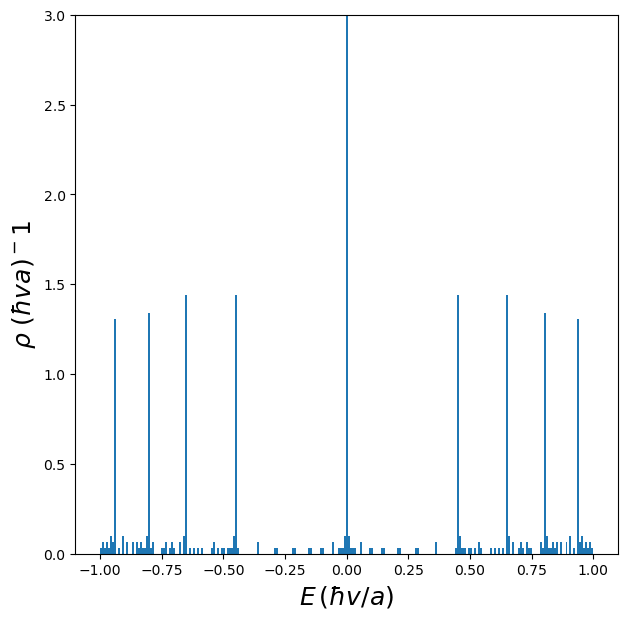

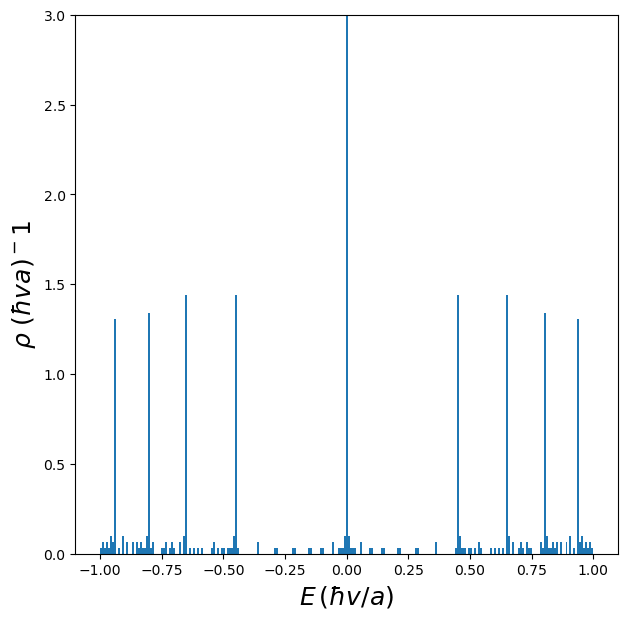

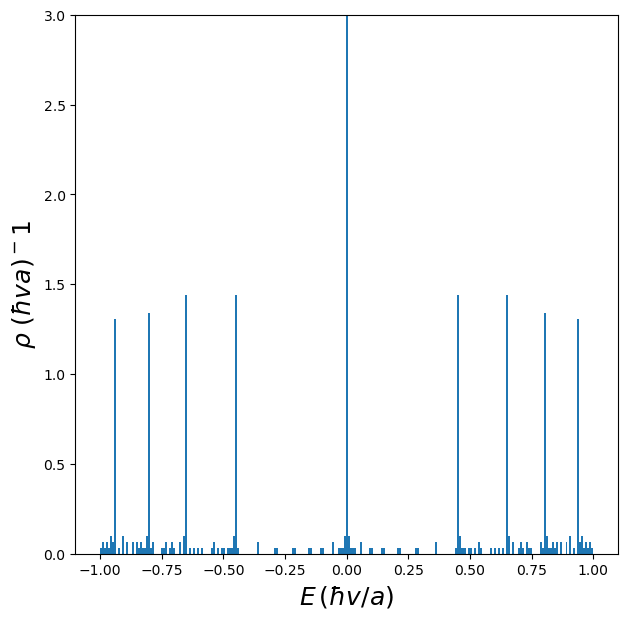

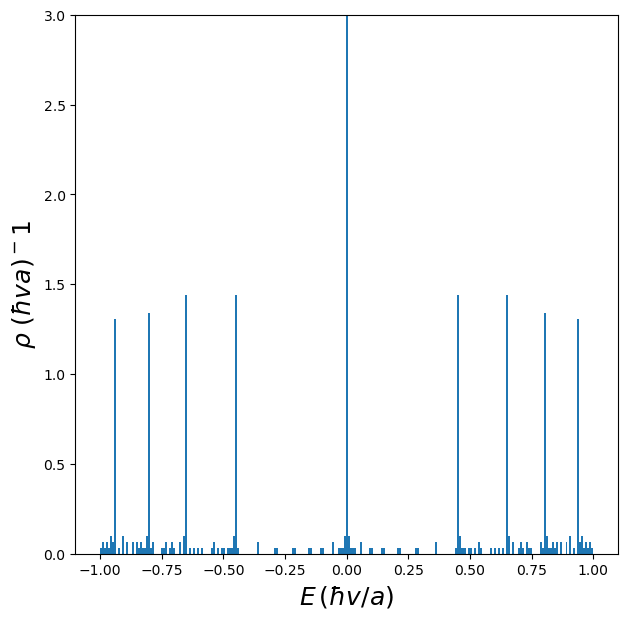

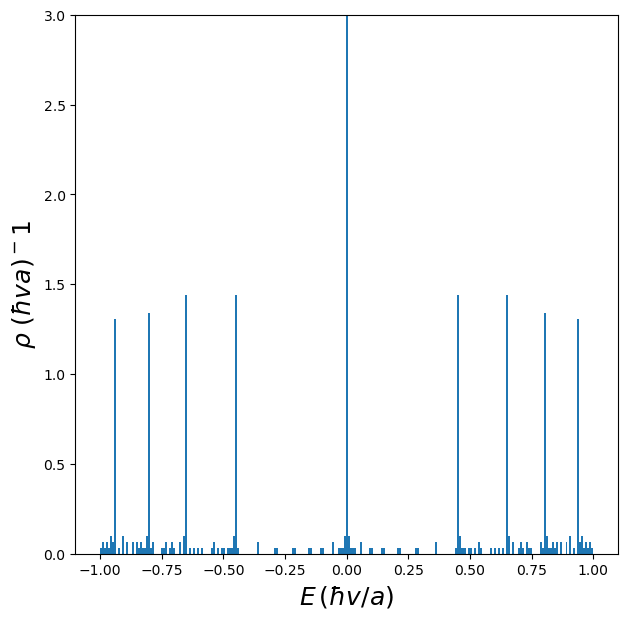

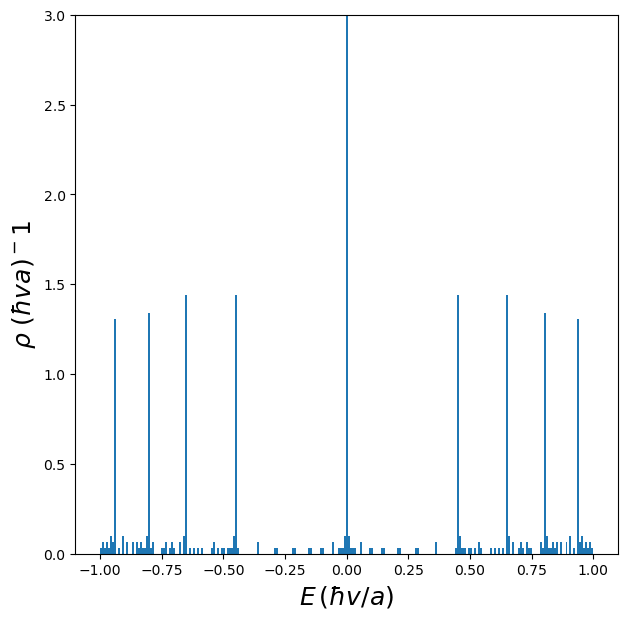

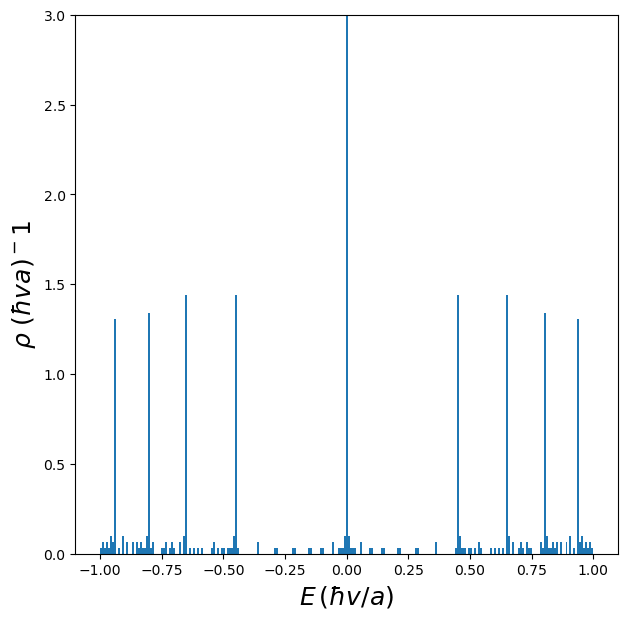

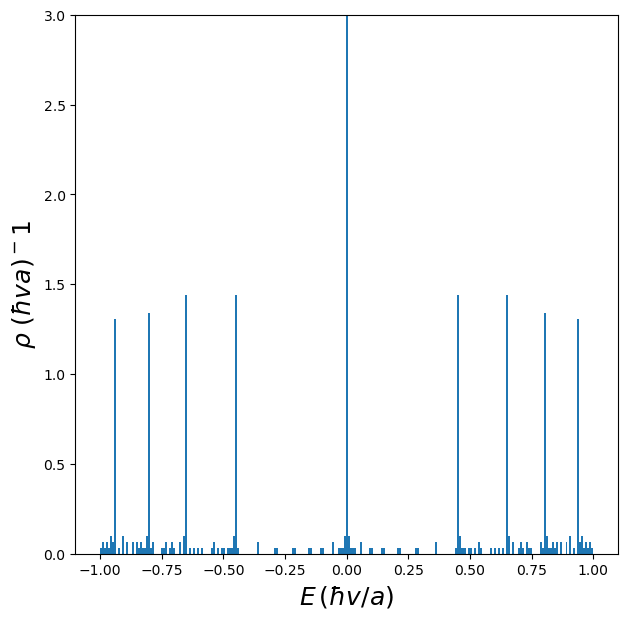

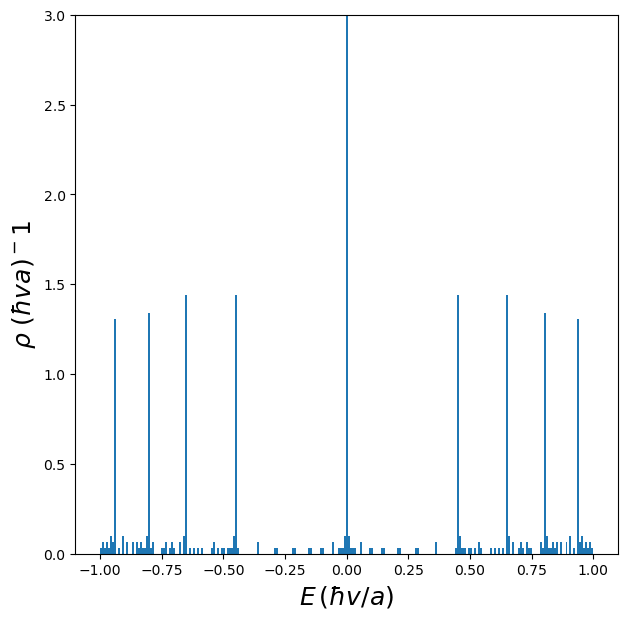

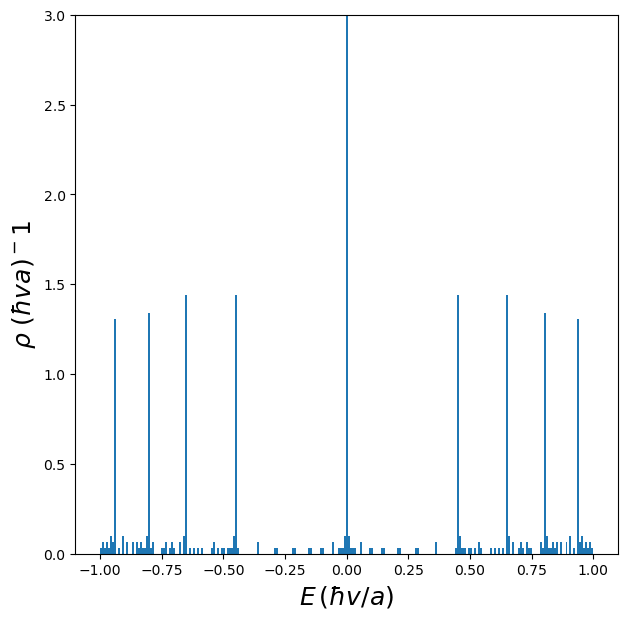

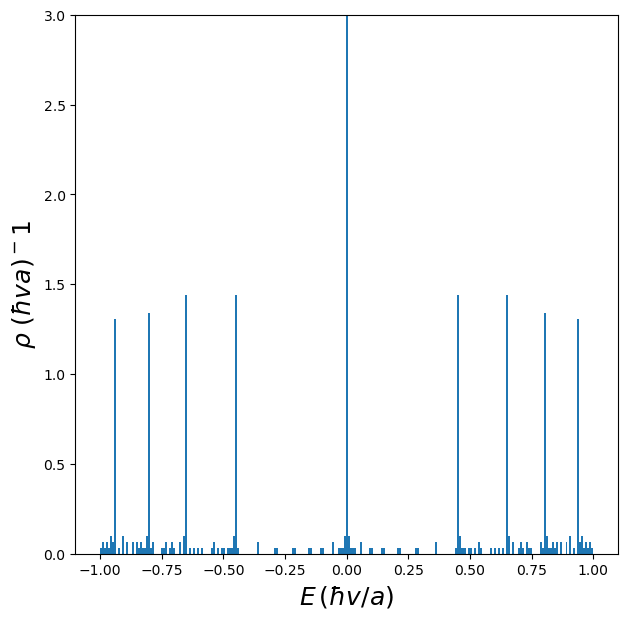

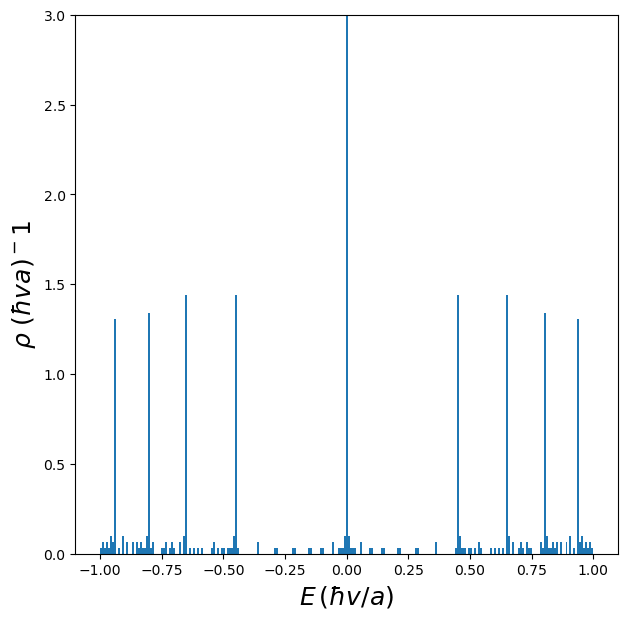

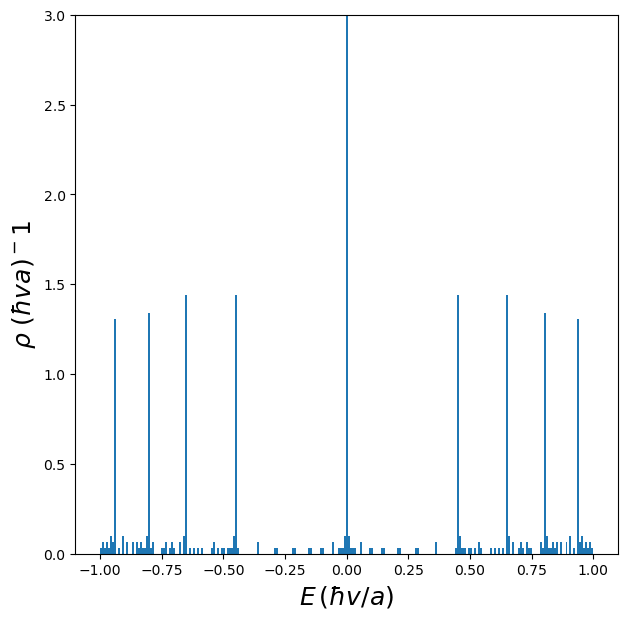

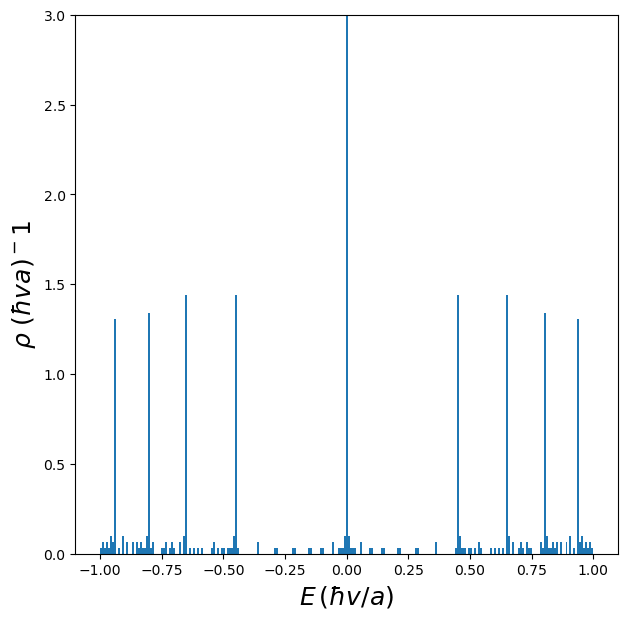

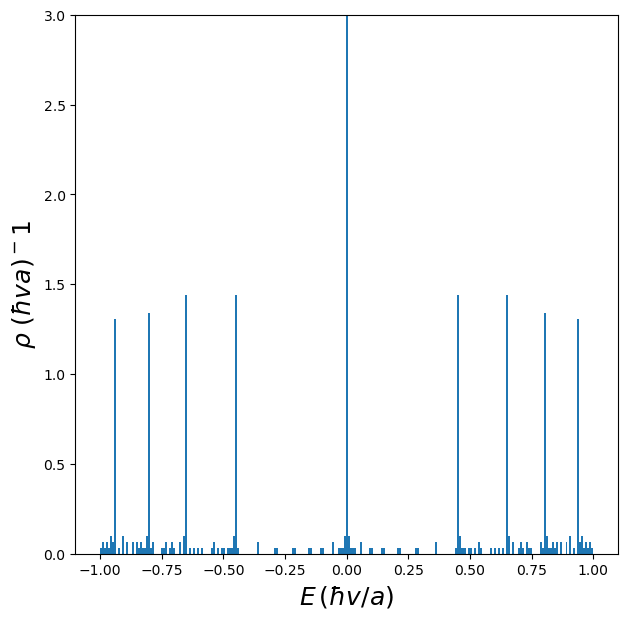

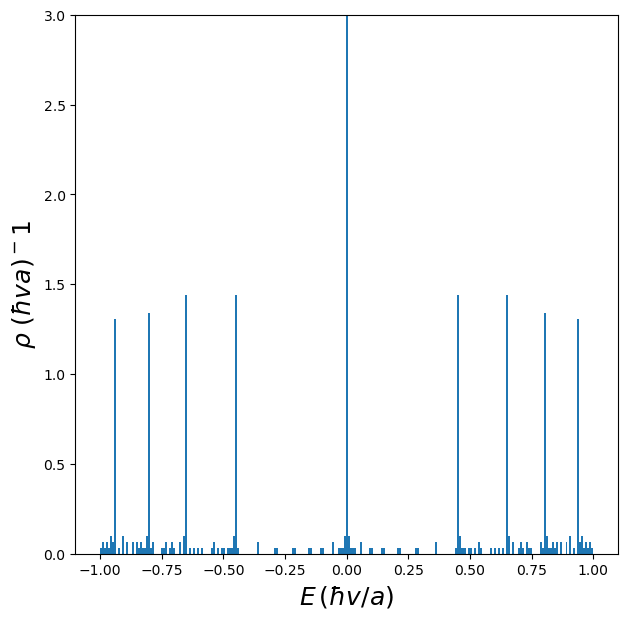

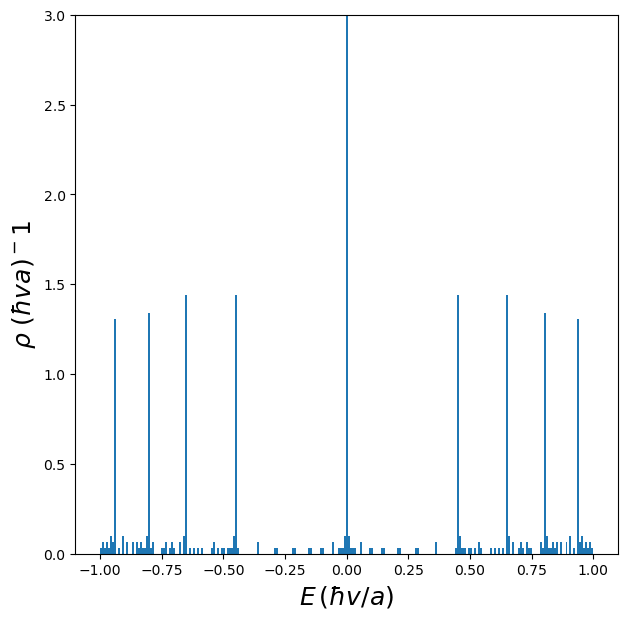

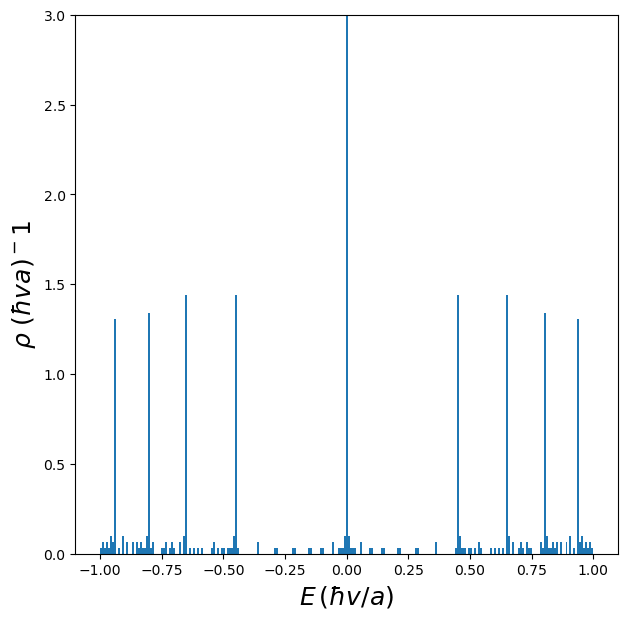

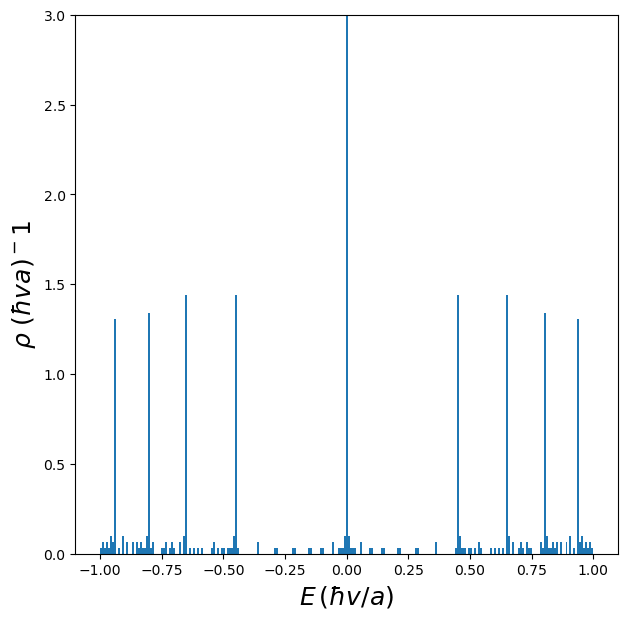

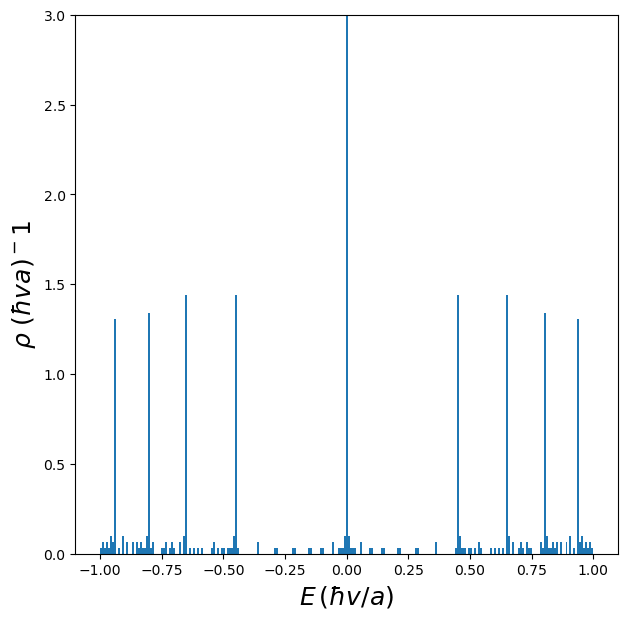

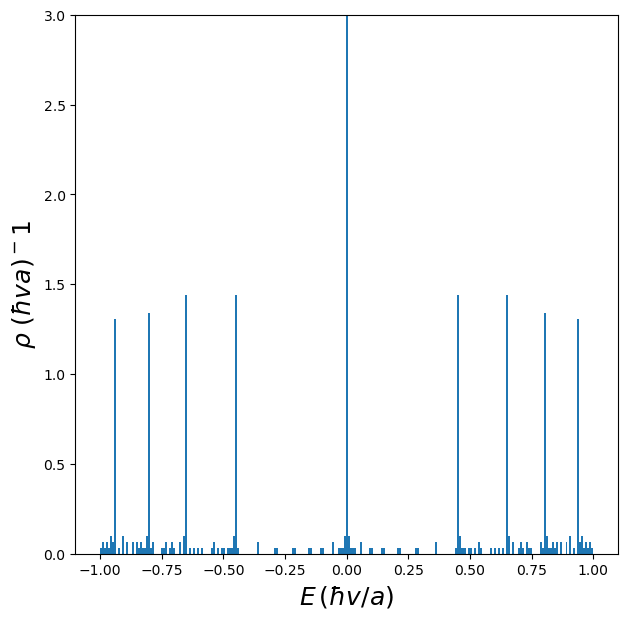

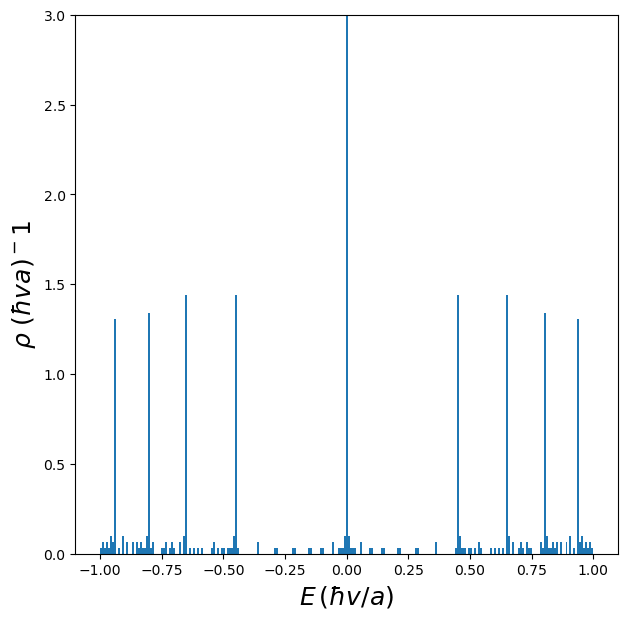

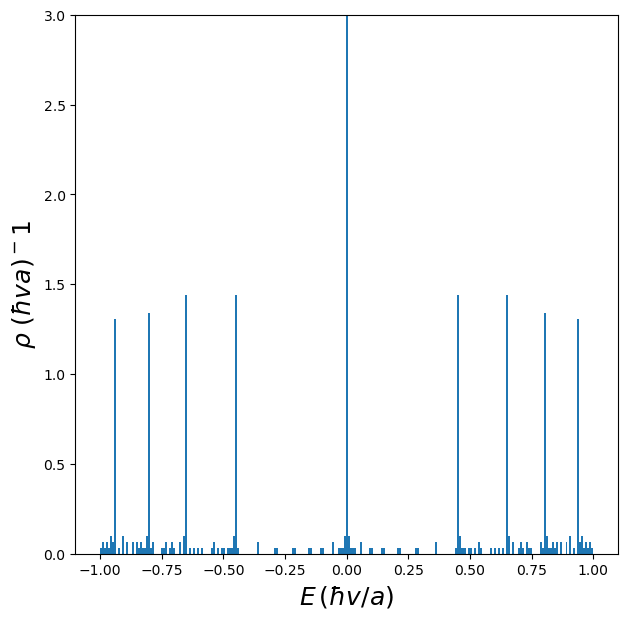

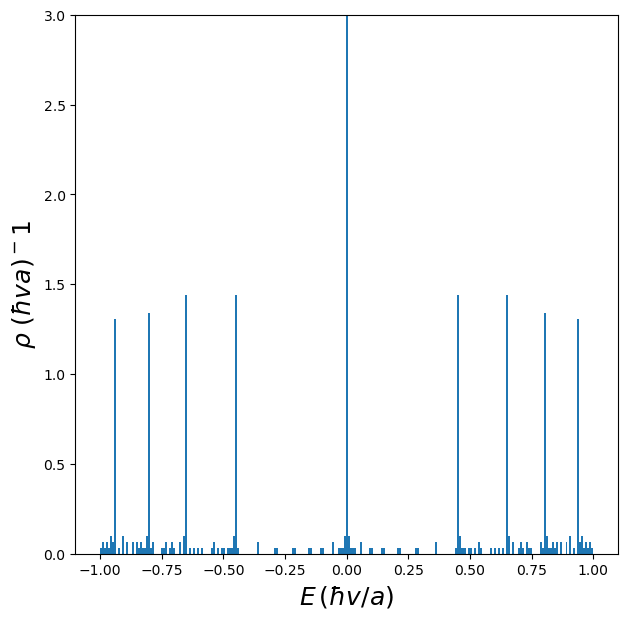

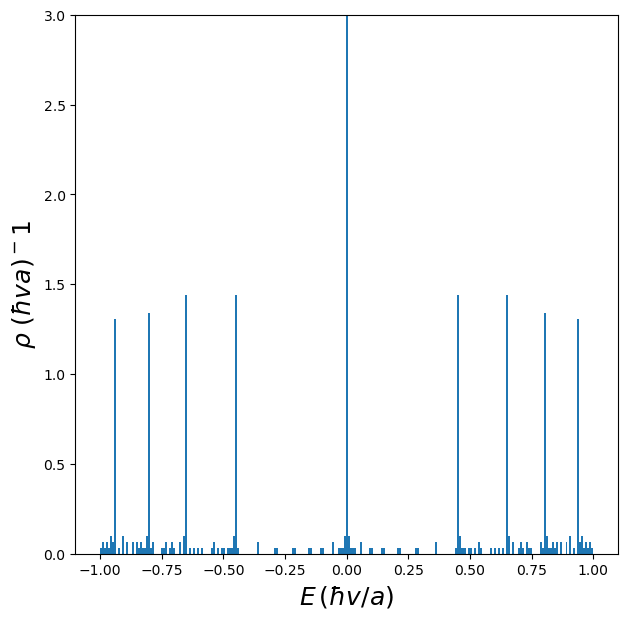

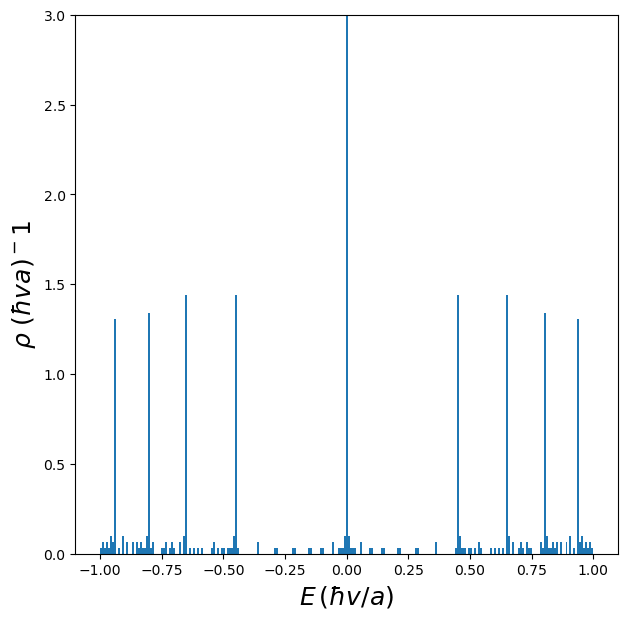

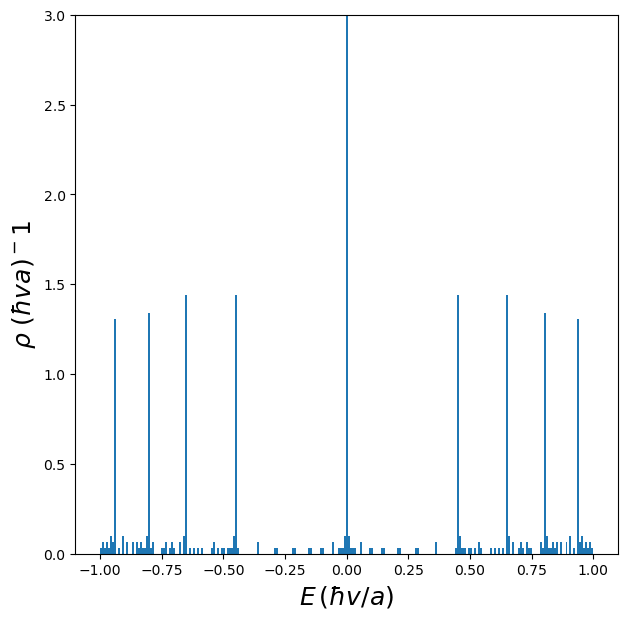

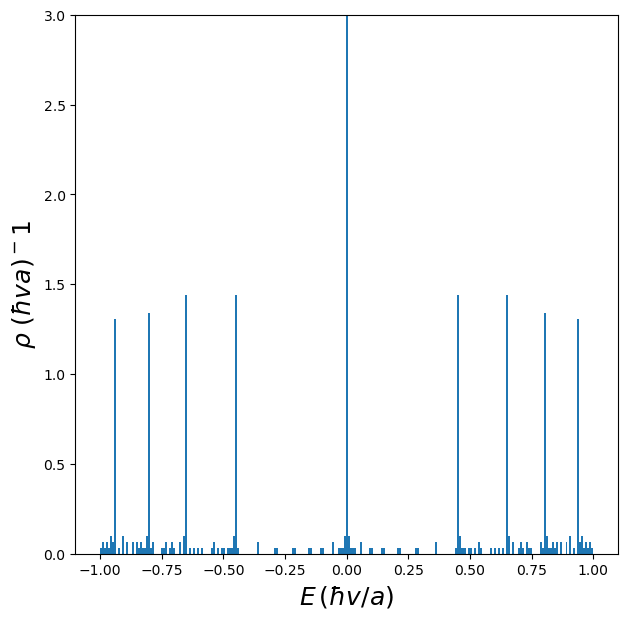

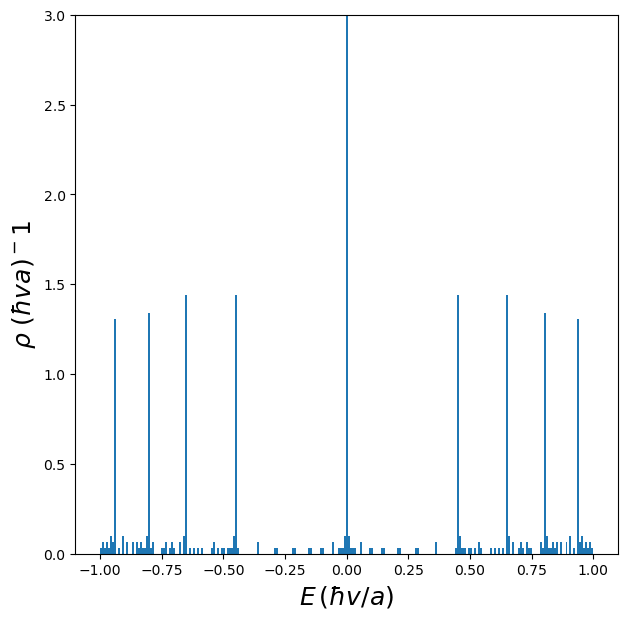

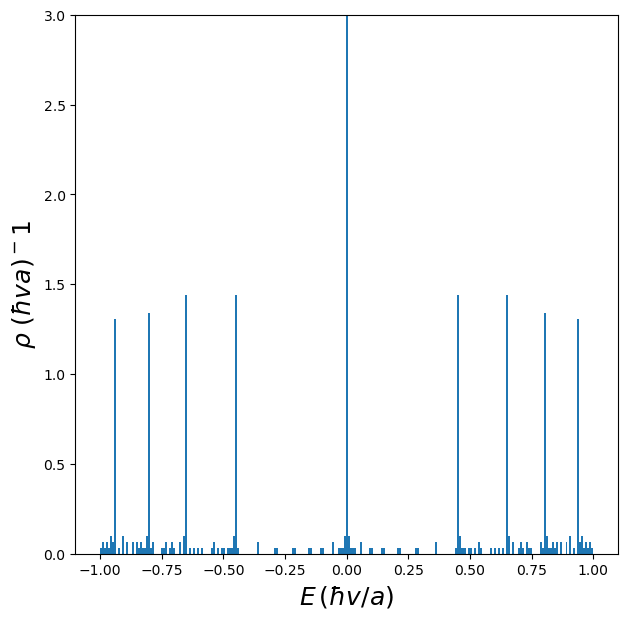

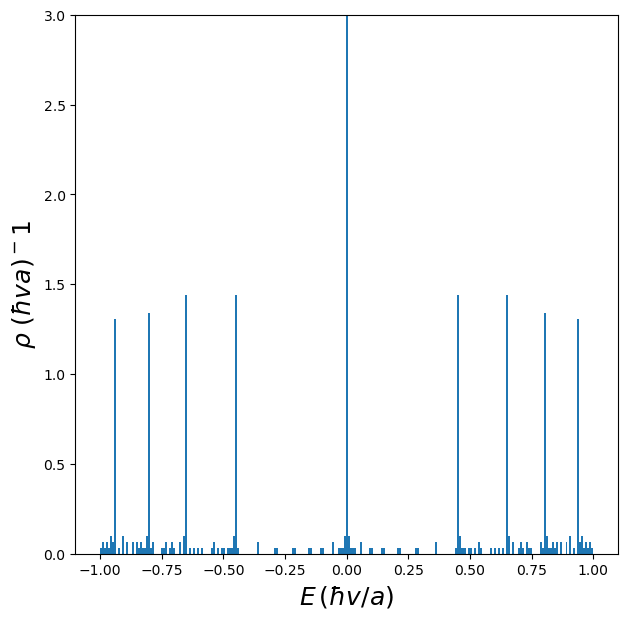

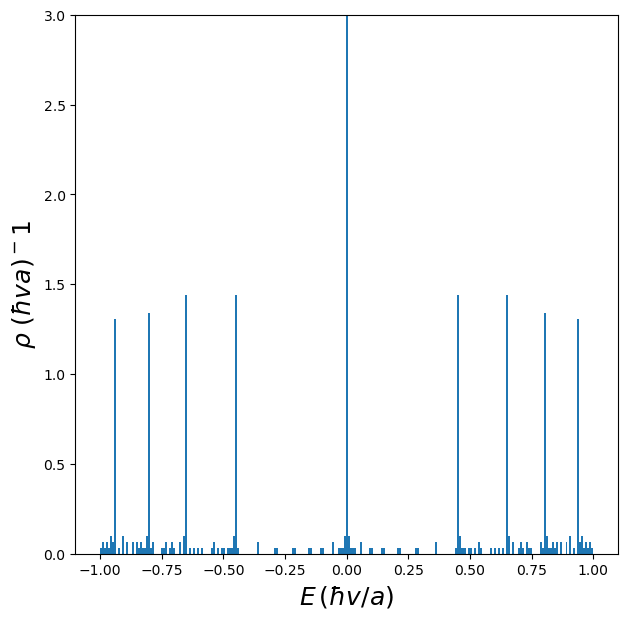

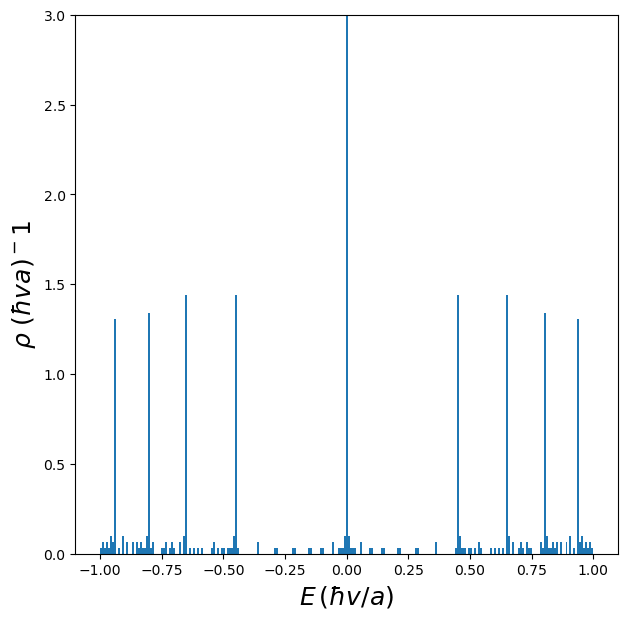

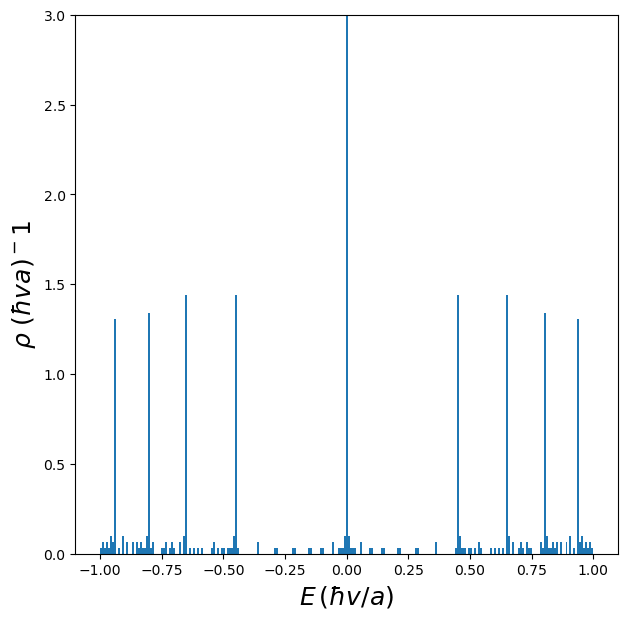

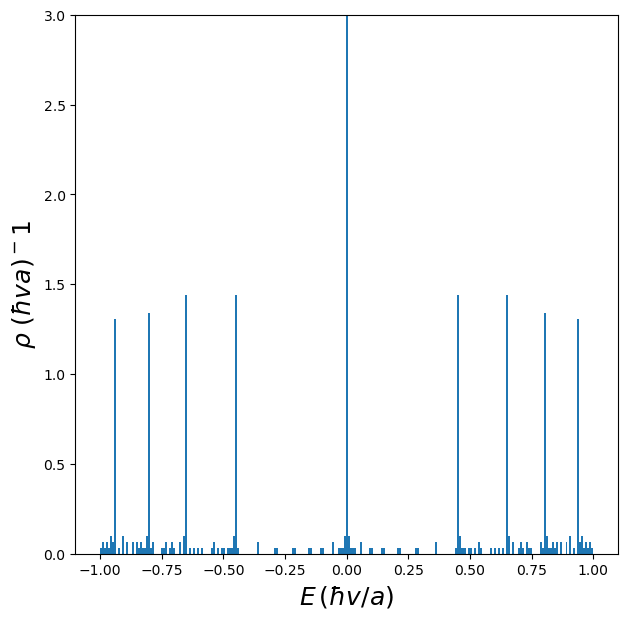

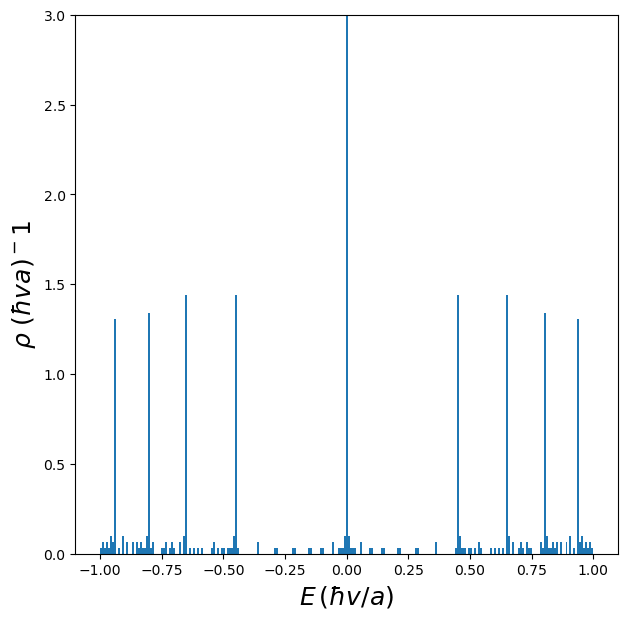

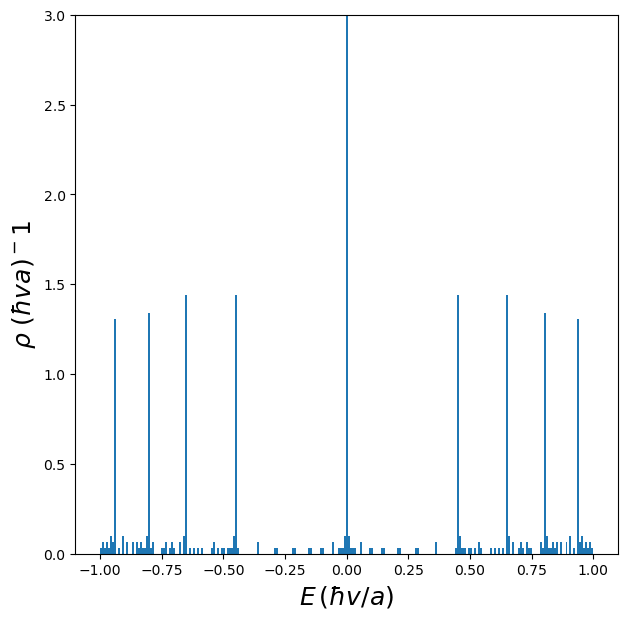

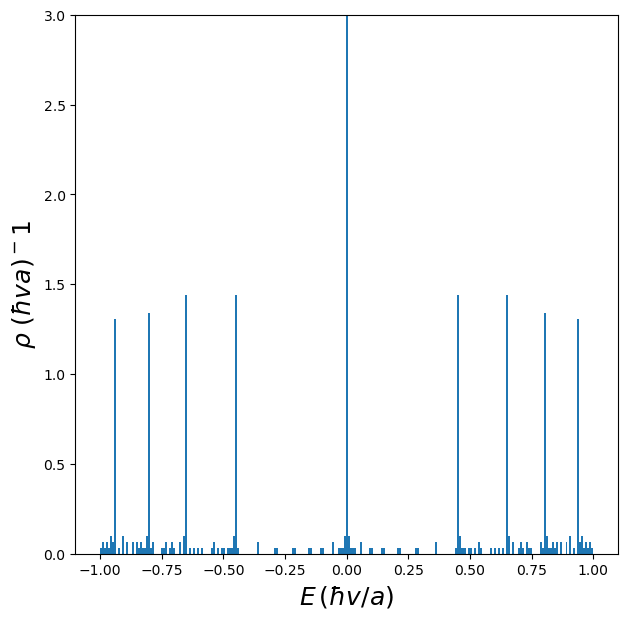

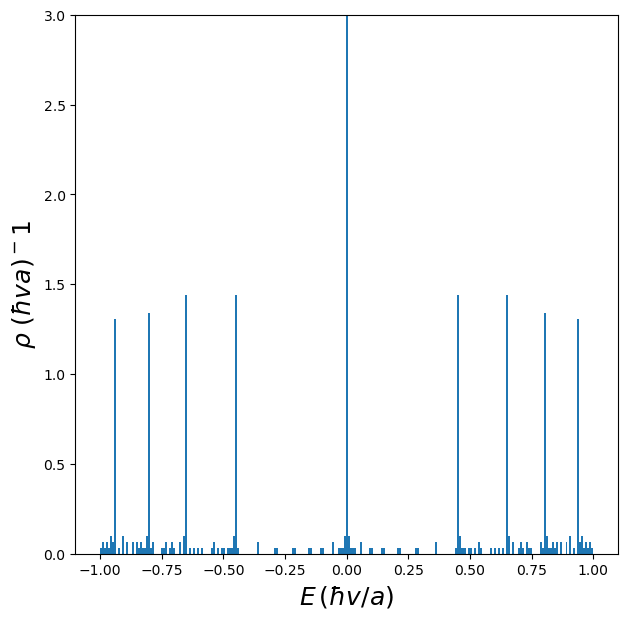

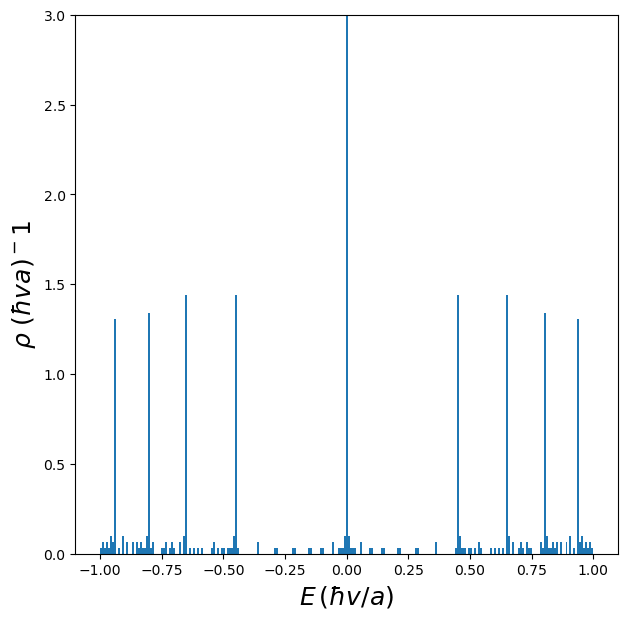

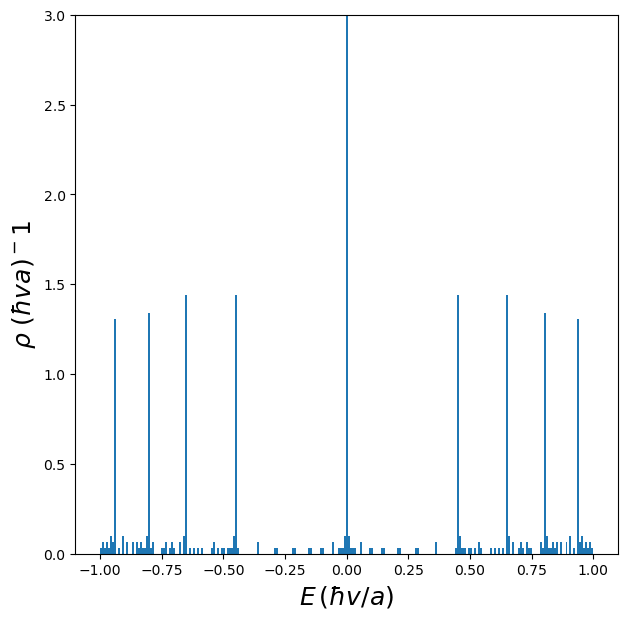

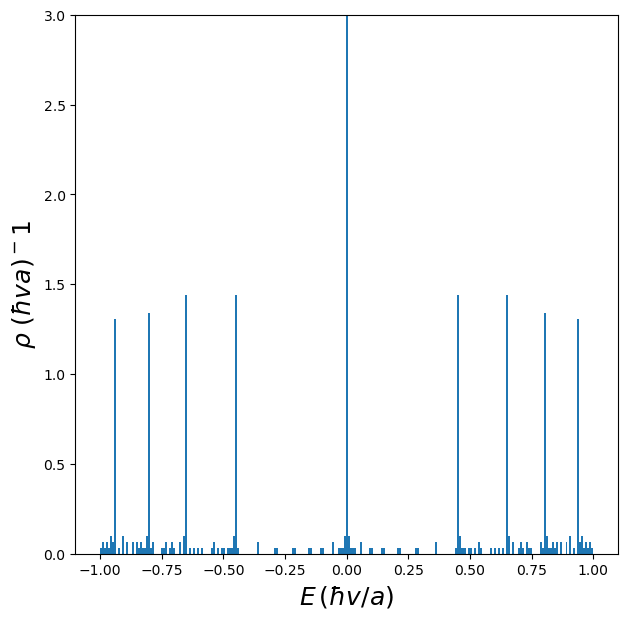

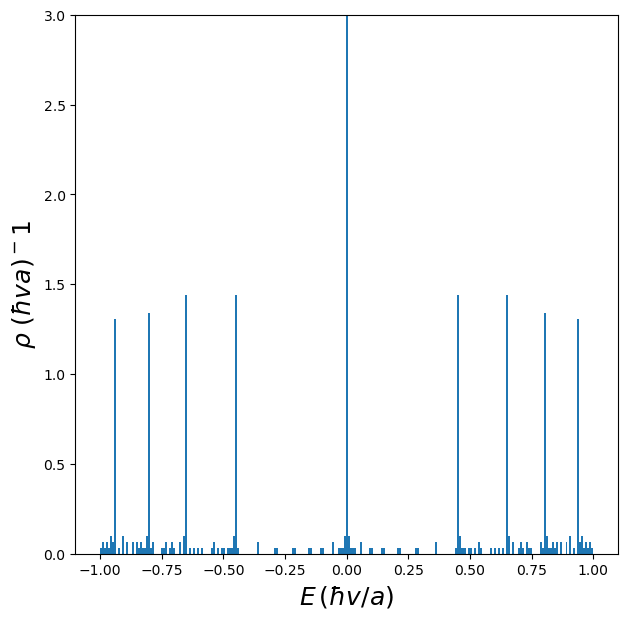

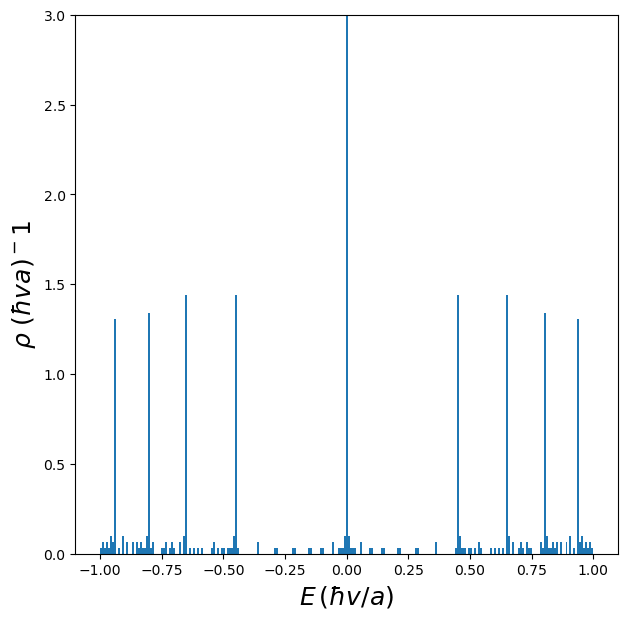

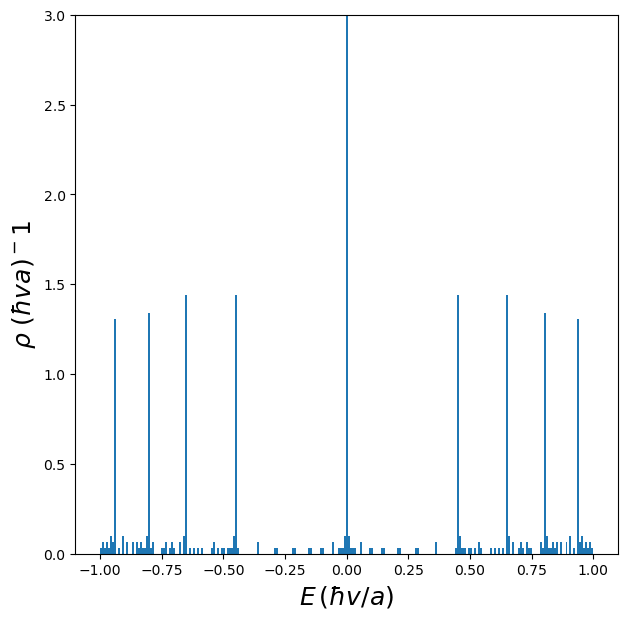

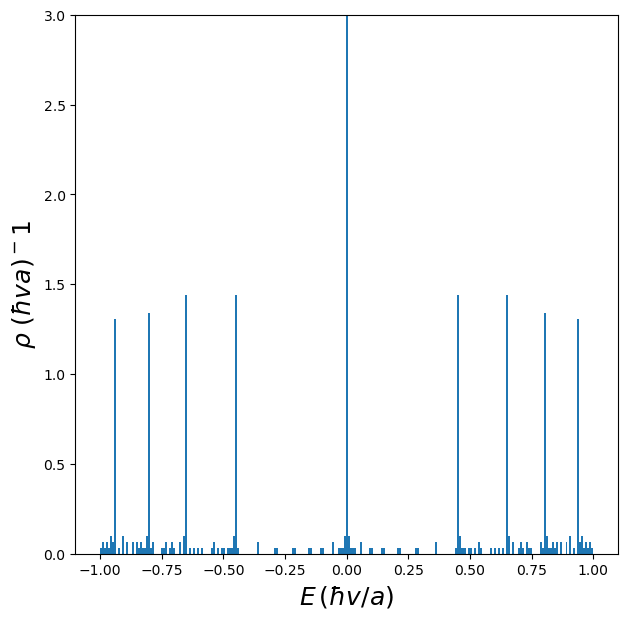

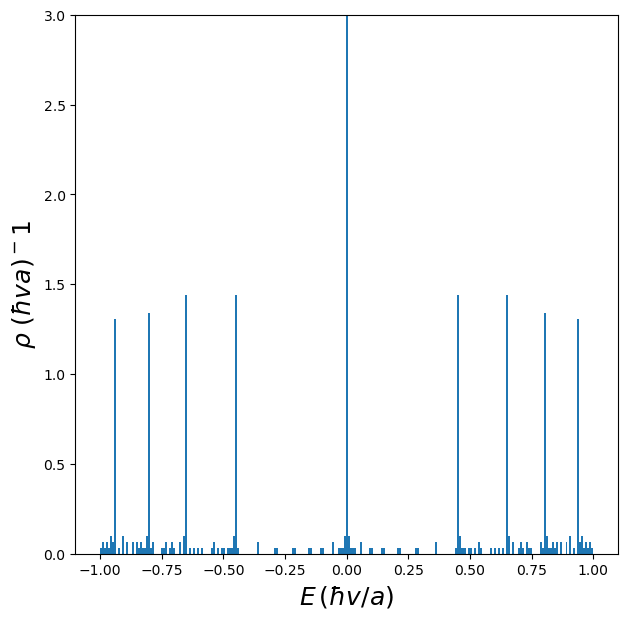

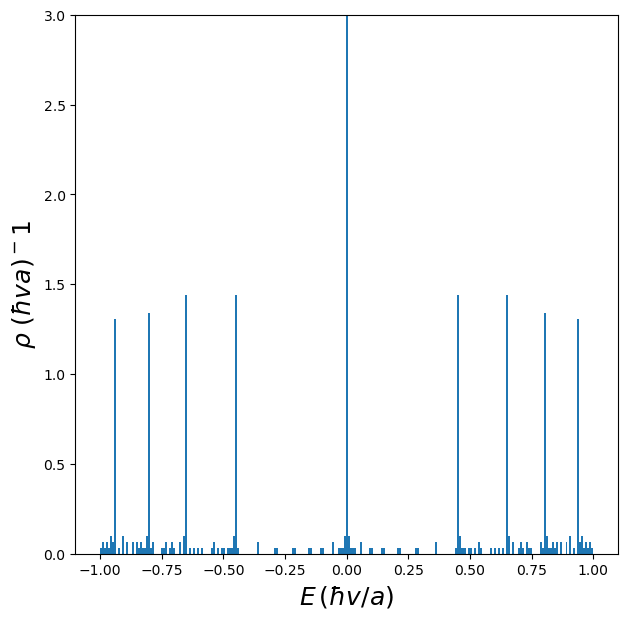

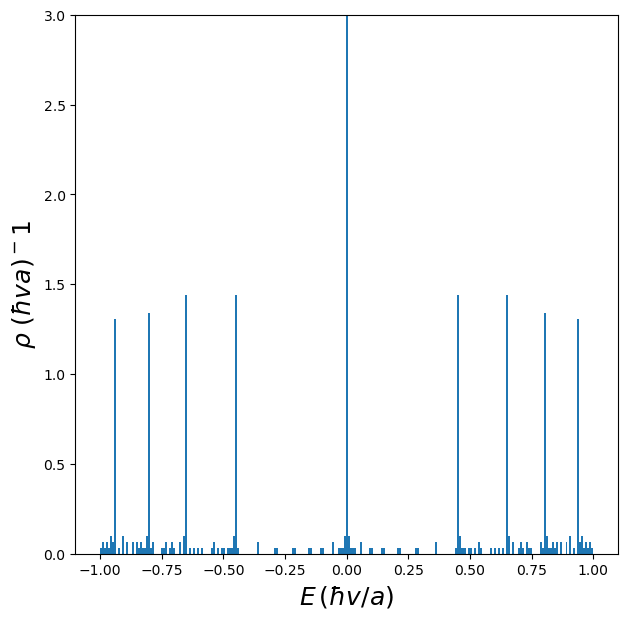

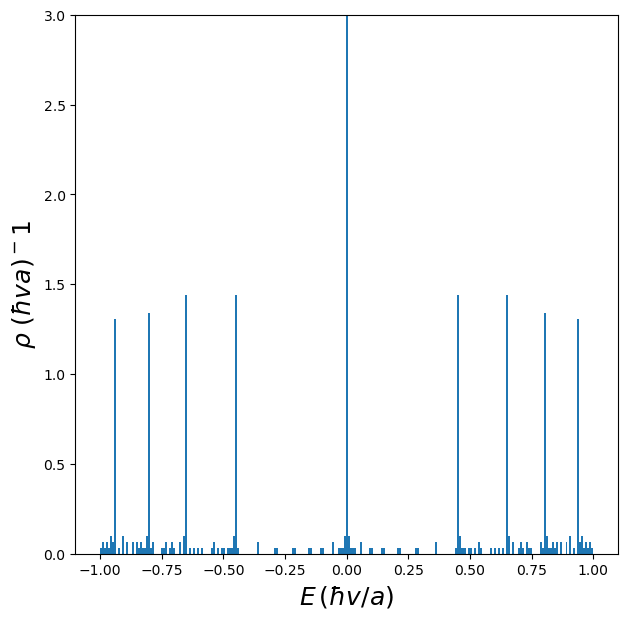

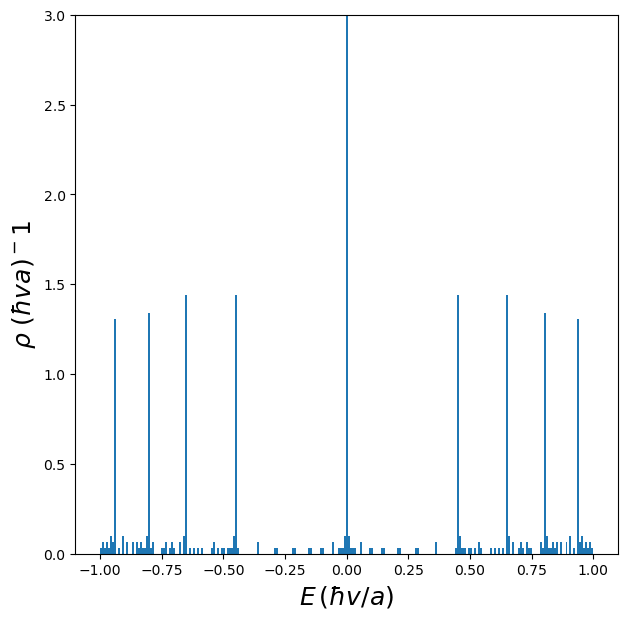

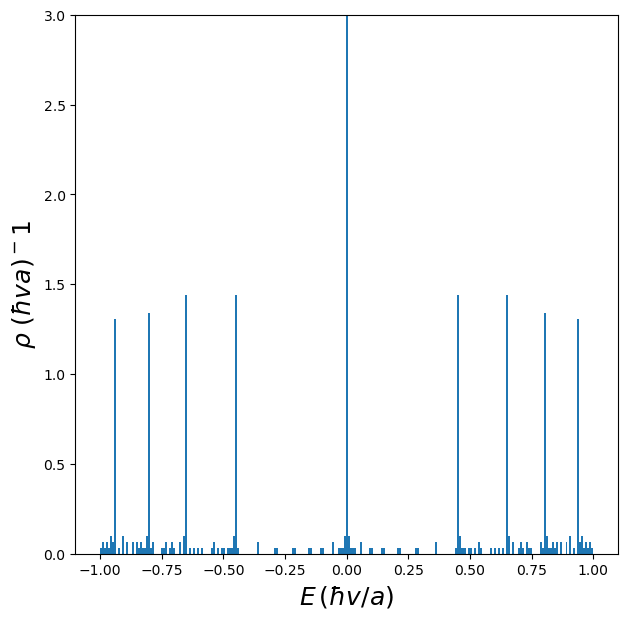

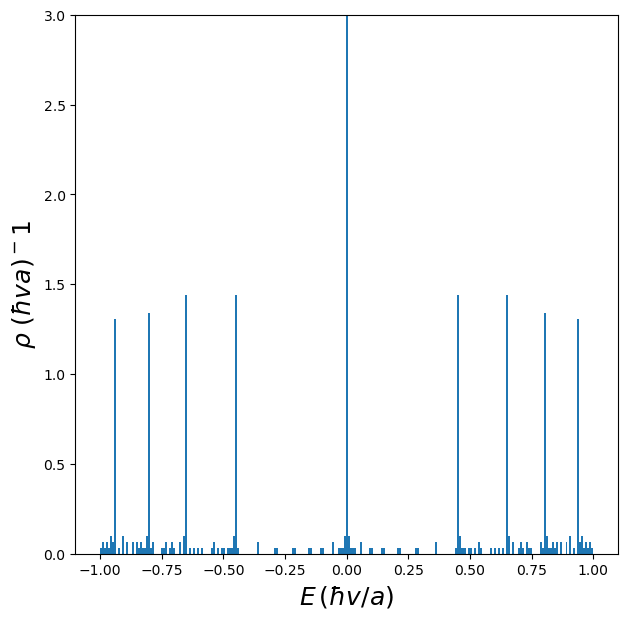

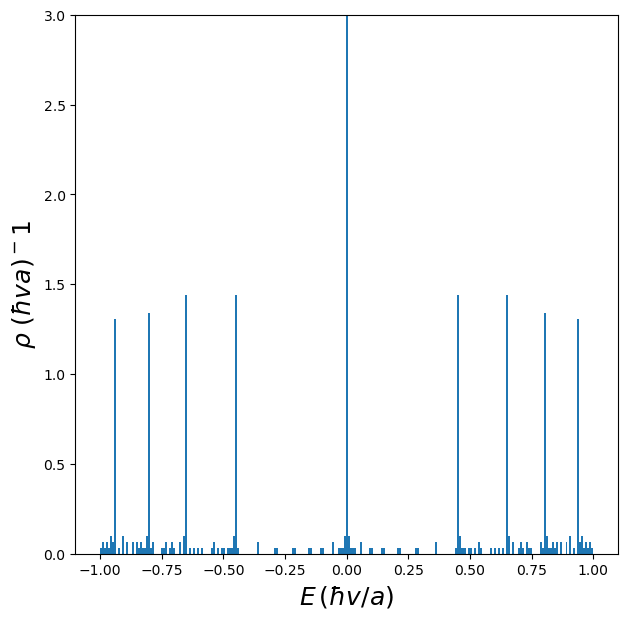

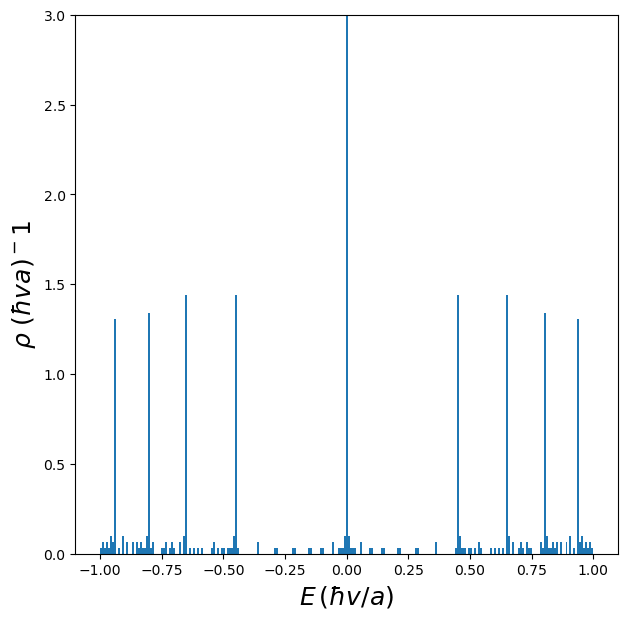

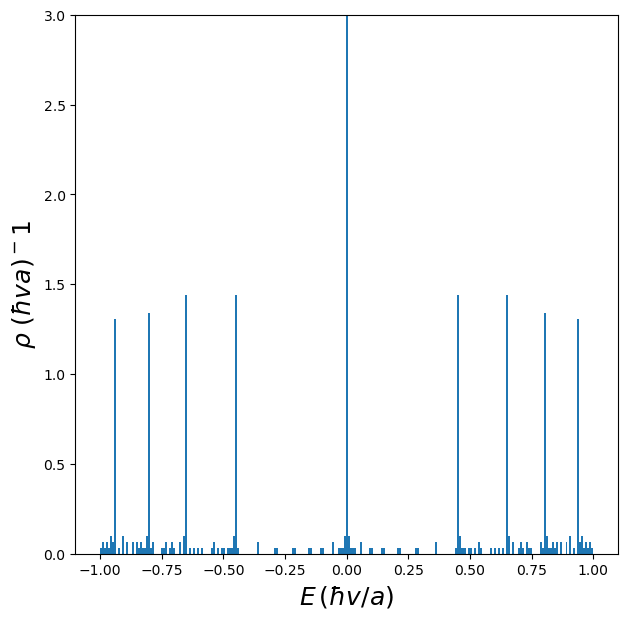

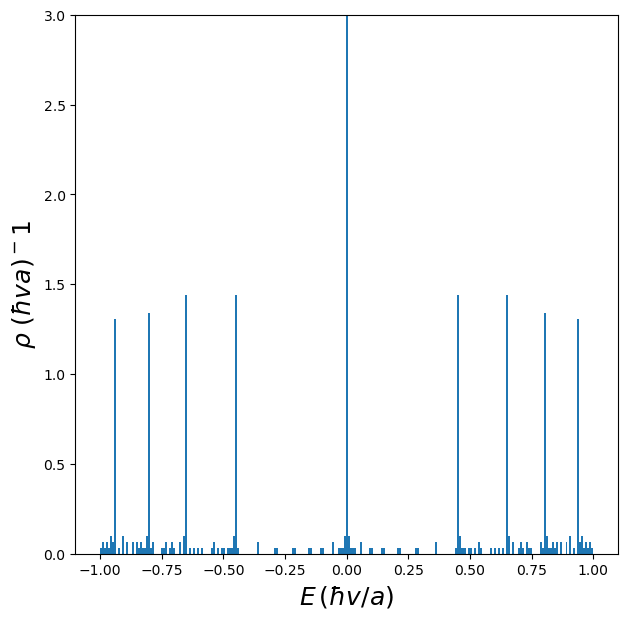

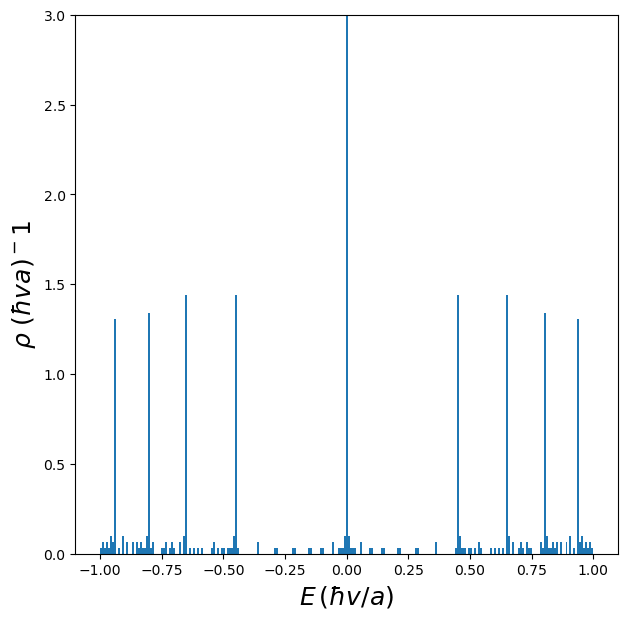

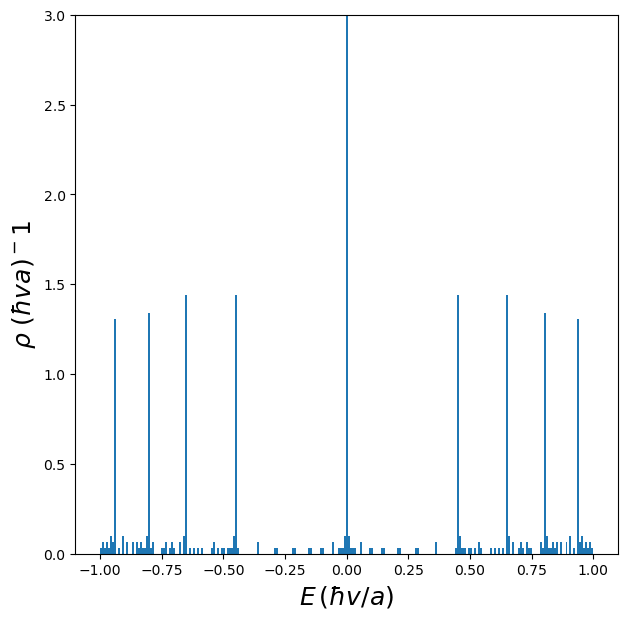

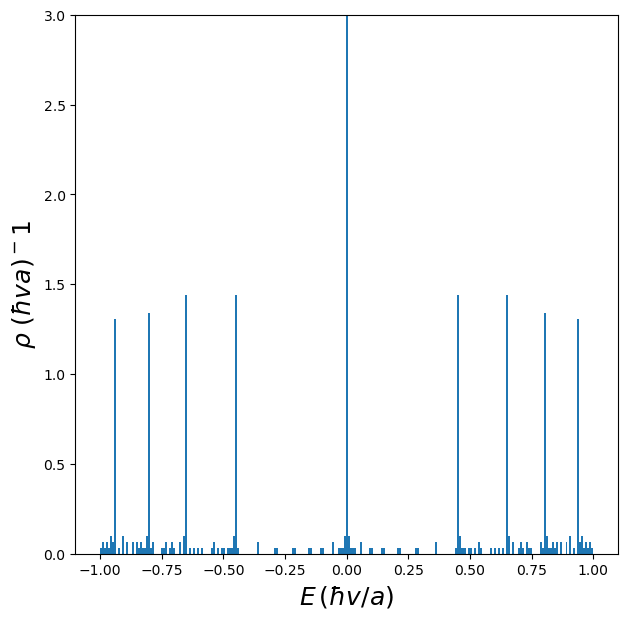

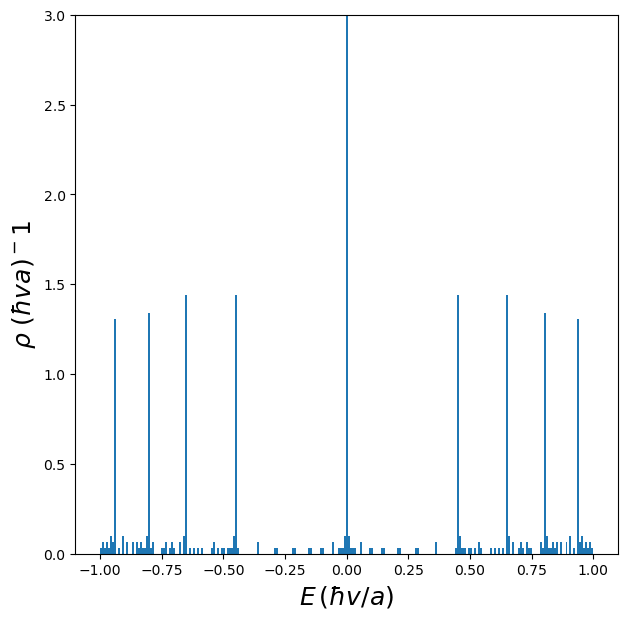

In [4]:
for job in range(number_of_jobs):
    nbins = parameters['Lx']*parameters['Ly']//15+1-(parameters['Lx']*parameters['Ly']//15)%2
    #The previous line ensures that the amount of bins is proportional to the system size and always odd.
    density_of_states, bin_edges = np.histogram(spectrum[job], bins = nbins, range = (-1,1), density = False)
    
    x = (bin_edges[1:]+bin_edges[:-1])/2
    dx = (bin_edges[1]-bin_edges[0])
    
    fig = plt.figure(figsize = (7,7))
    ax = fig.add_subplot(111)
    area = parameters['Lx']*parameters['Ly']
    ax.bar(x,density_of_states/dx/area,width = dx)
    ax.set_ylabel(r"$\rho$ $(\hbar va)^-1$",fontsize = 18)
    ax.set_xlabel(r"$E\,(\hbar v/a)$",fontsize = 18)
    #ax.axvline(np.sqrt(2*parameters['mag_field']), c = 'C3') #First Landau level
    ax.set_ylim(0,3)